# Stack Overflow 2023 Developer Survey

## 0. Motivation

As an experienced business professional pivoting into data science, my aim is to analyse the [Stack Overflow 2023 Developer Survey](https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2023-developers-survey) results to obtain answers to the following questions :

**1. What does a typical tech stack look like these days?**

**2. What are the most popular learning resources?** 

**3. How do salary levels vary according to industry and job title?**

**4. To what extent are AI tools being leveraged and what is the general sentiment with regards to AI - do people trust it?** 

Hoepfully the insights gained from my analysis will also prove informative to the wider technology community at large. 

### 0.1 Libraries & packages

In [1]:
import pandas as pd
# Set the display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import missingno as msno
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 0.2 Raw data

The survey was fielded from 89,184 respondents between May 8 and May 19, 2023. The questions were spread over seven sections:

1. Basic Information
2. Education, Work, and Career
3. Technology and Tech Culture
4. Stack Overflow Usage + Community
5. Artificial Intelligence
6. Professional Developer Series (Optional)
7. Final Questions

The data can be accessed from [here](https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2023-developers-survey/download?datasetVersionNumber=1).

In [2]:
# 2023 survey
stack_overflow_2023 = pd.read_csv('data/survey_results_public_2023.csv')
stack_overflow_2023

ResponseId     Q120                      MainBranch  \
0               1  I agree                   None of these   
1               2  I agree  I am a developer by profession   
2               3  I agree  I am a developer by profession   
3               4  I agree  I am a developer by profession   
4               5  I agree  I am a developer by profession   
...           ...      ...                             ...   
89179       89180  I agree  I am a developer by profession   
89180       89181  I agree  I am a developer by profession   
89181       89182  I agree     I code primarily as a hobby   
89182       89183  I agree  I am a developer by profession   
89183       89184  I agree  I am a developer by profession   

                      Age                                         Employment  \
0         18-24 years old                                                NaN   
1         25-34 years old                                Employed, full-time   
2         45-54 years old                                Employed, full-time   
3         25-34 years old                                Employed, full-time   
4         25-34 years old  Employed, full-time;Independent contractor, fr...   
...                   ...                                                ...   
89179     25-34 years old  Employed, full-time;Independent contractor, fr...   
89180     18-24 years old             Student, full-time;Employed, part-time   
89181   Prefer not to say                                I prefer not to say   
89182  Under 18 years old             Employed, part-time;Student, part-time   
89183     35-44 years old                                Employed, full-time   

                                 RemoteWork  \
0                                       NaN   
1                                    Remote   
2      Hybrid (some remote, some in-person)   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
...                                     ...   
89179                                Remote   
89180  Hybrid (some remote, some in-person)   
89181                                   NaN   
89182  Hybrid (some remote, some in-person)   
89183  Hybrid (some remote, some in-person)   

                                        CodingActivities  \
0                                                    NaN   
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
...                                                  ...   
89179  Hobby;Bootstrapping a business;Freelance/contr...   
89180                            School or academic work   
89181                                                NaN   
89182                      Hobby;School or academic work   
89183  Hobby;Professional development or self-paced l...   

                                                 EdLevel  \
0                                                    NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
89179                Associate degree (A.A., A.S., etc.)   
89180       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
89181                                     Something else   
89182  Secondary school (e.g. American high school, G...   
89183       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                               LearnCode  \
0                                                    NaN   
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online.

So as we can see our dataset has **89,184 rows**, representing the number of respondents, and **84 columns**, representing responses to the survey questions.

## 1.0 Missing data?

Establishing the extent of missing data is crucial to any data analysis project, with survey data notorious for quality issues. Let's take a closer look at our data :

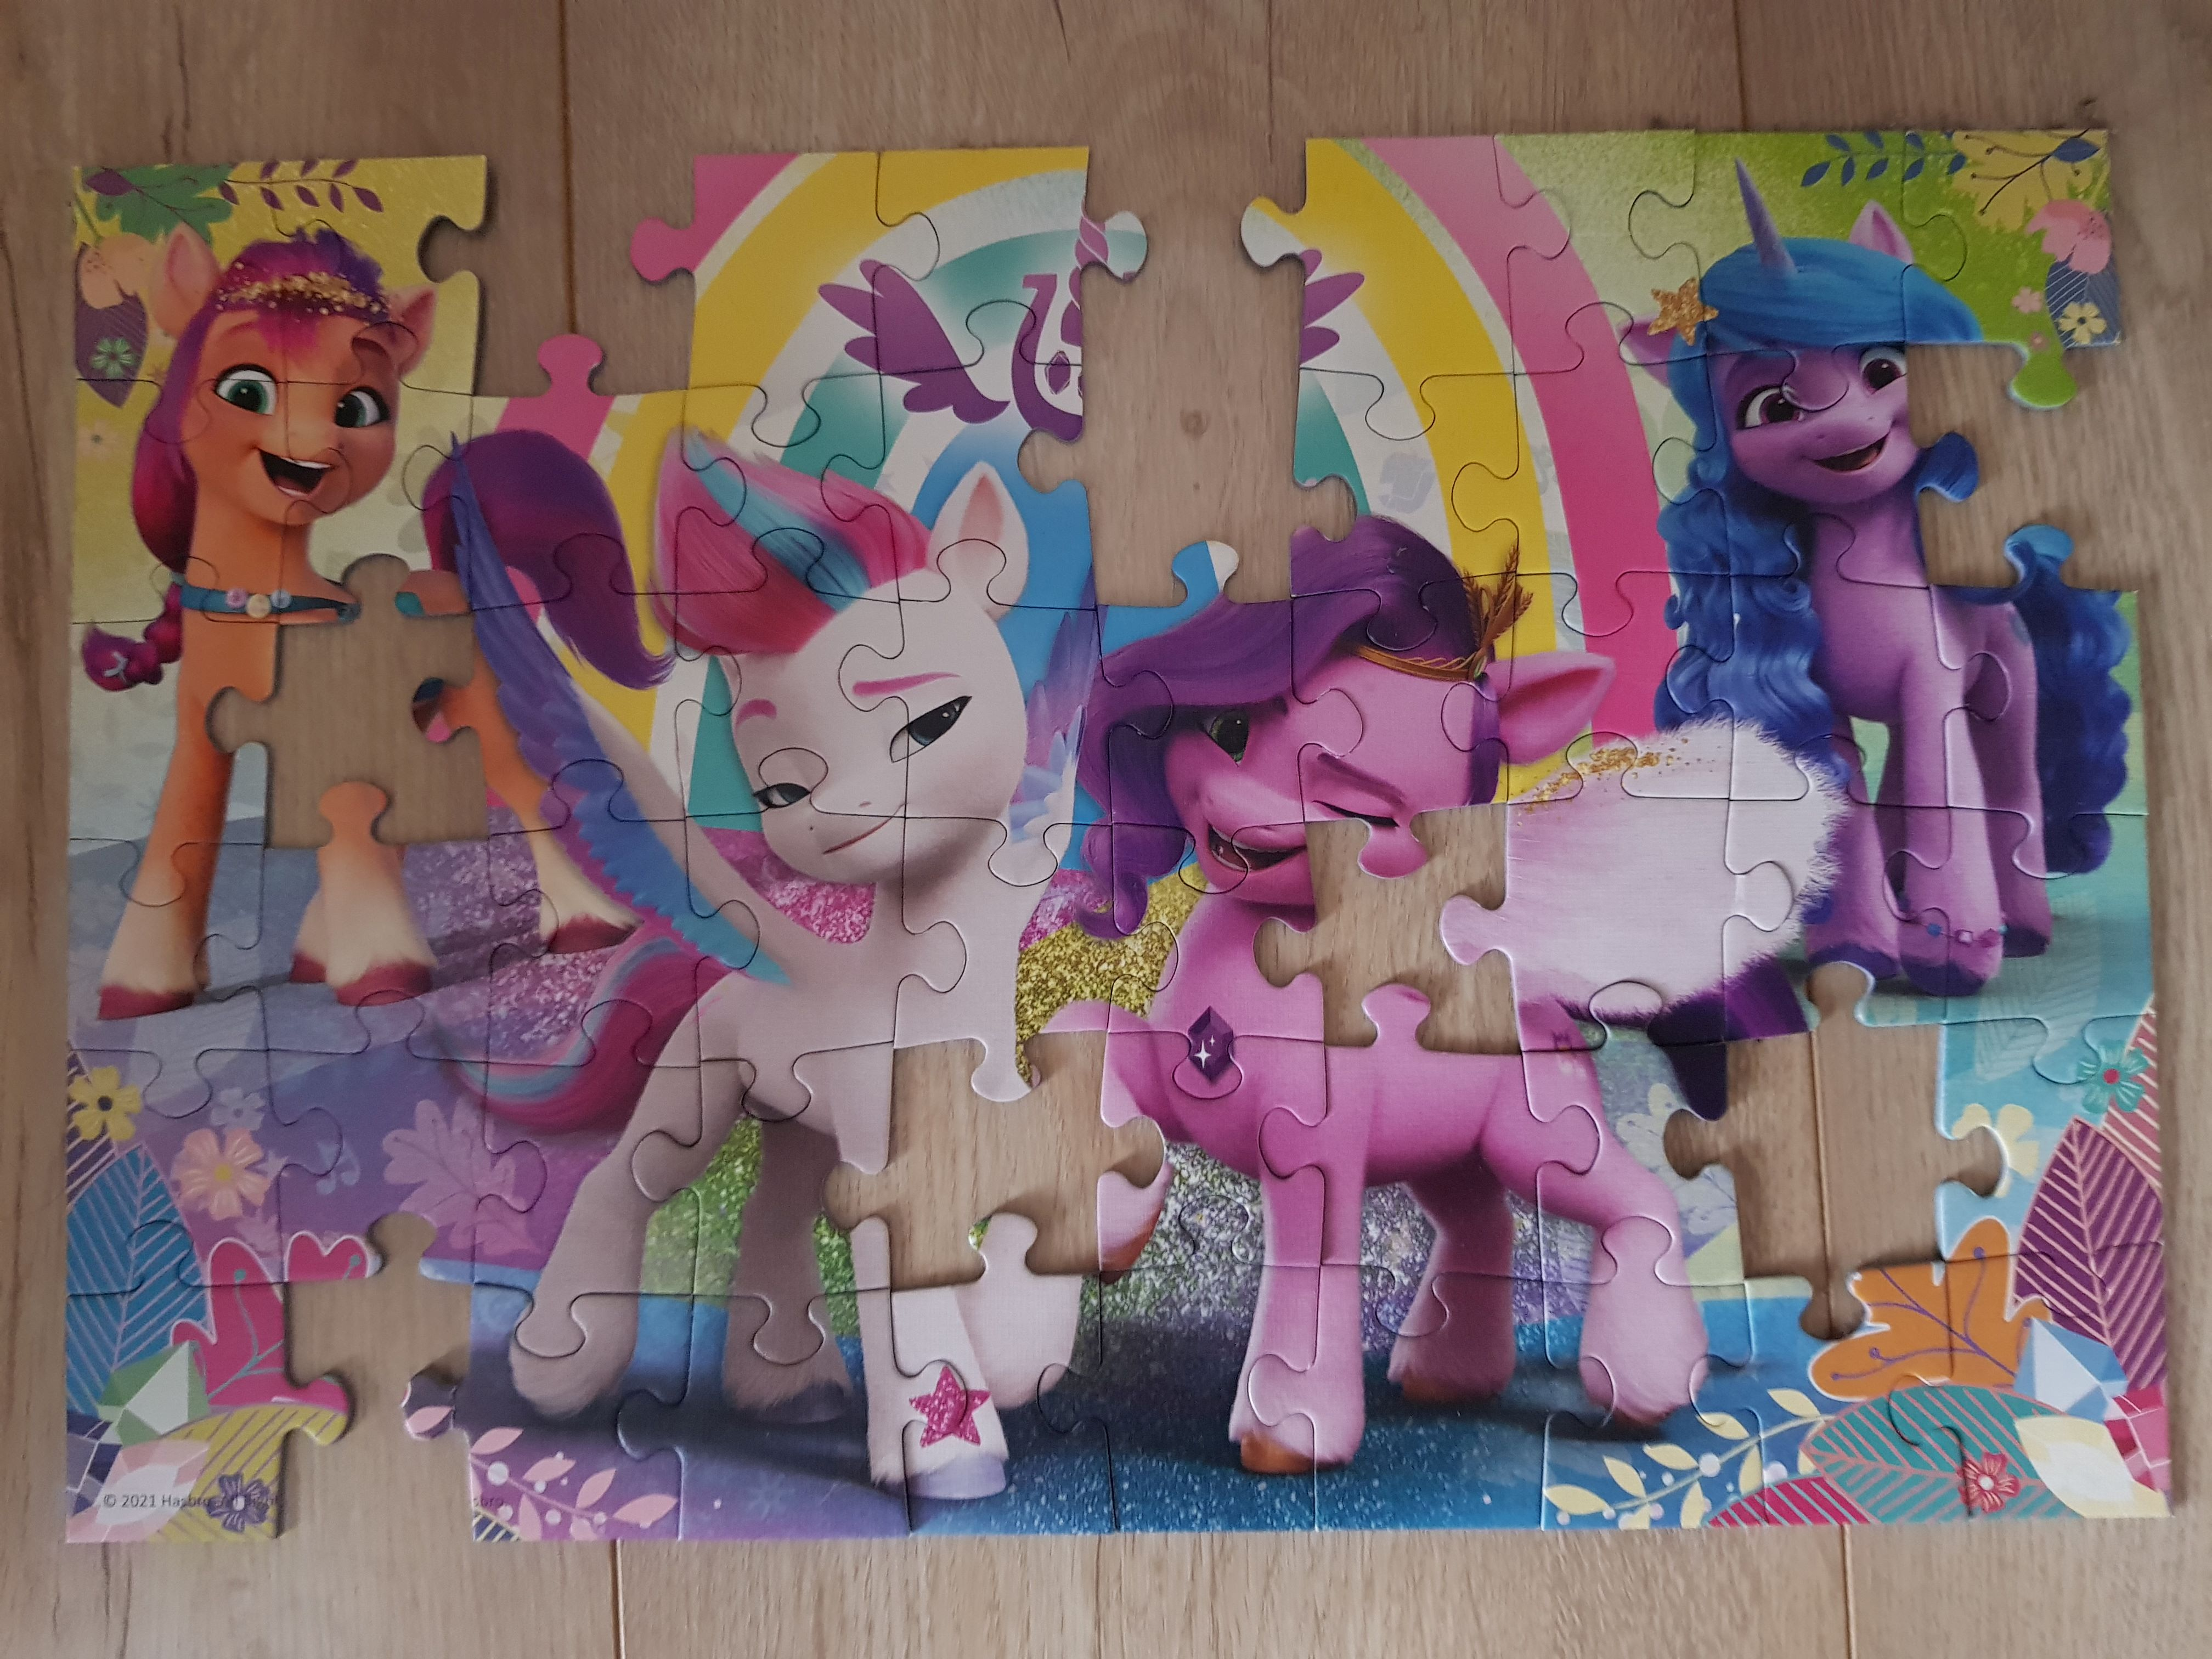

In [3]:
no_nulls = set(stack_overflow_2023.columns[stack_overflow_2023.isnull().mean()==0])
no_nulls

{'Age', 'MainBranch', 'Q120', 'ResponseId'}

In [4]:
most_missing_cols = set(stack_overflow_2023.columns[stack_overflow_2023.isnull().mean() > 0.75]) #Provide a set of columns with more than 75% of the values missing
most_missing_cols

{'AIDevWantToWorkWith',
 'AINextNeither different nor similar',
 'AINextSomewhat similar',
 'AINextVery different',
 'AINextVery similar',
 'AIToolNot interested in Using'}

### 1.1 missingno

The above methods works fine, but I like to use `missingno` to get a quick visual summary of missing data. This library provides a small toolset of flexible and easy-to-use missing data visualizations and utilities. Just `pip install missingno` to get started.

Check out the [GitHub page](https://github.com/ResidentMario/missingno) for more details.

<Axes: >

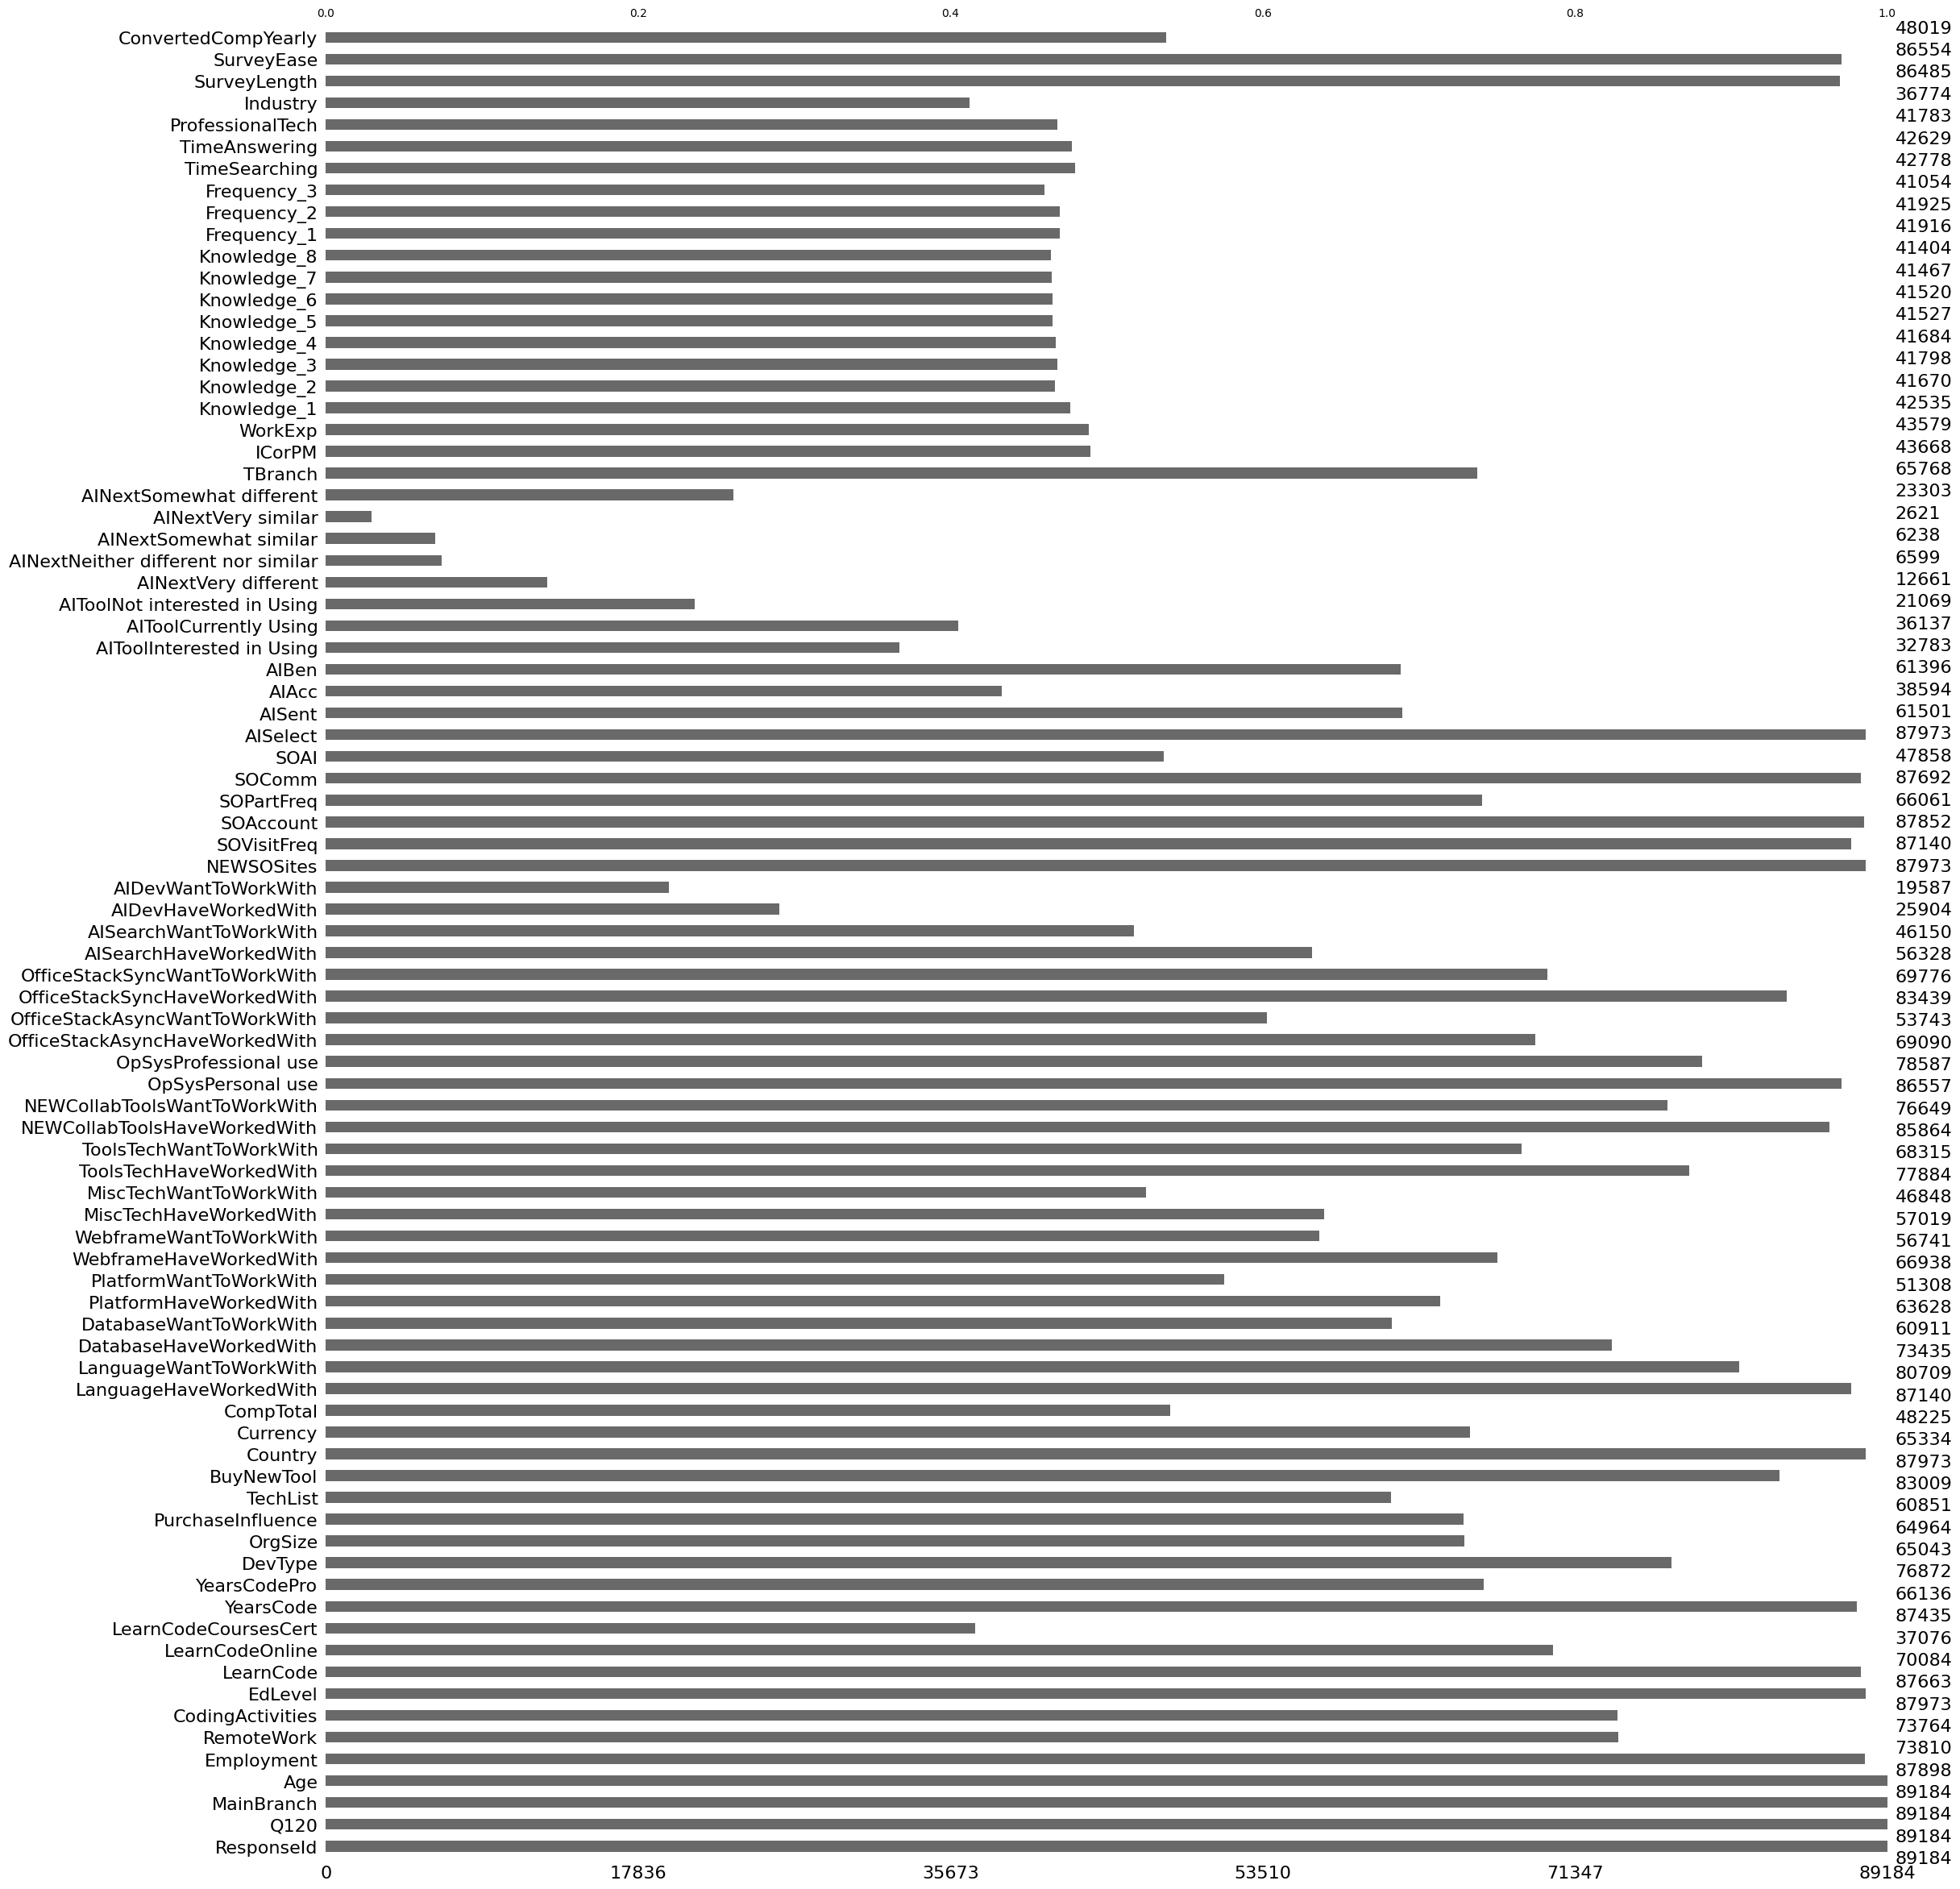

In [5]:
msno.bar(stack_overflow_2023)

As you can see from the whitespace there is a lot of missing data. The decision of when and how to drop or impute missing values is a very subjective one. Given the nature of the dataset(derived from an isolated survey), and for the purposes of my analysis(no machine learning modeling) I decided not to drop data or impute missing values. 

In [6]:
stack_overflow_2023.ConvertedCompYearly.mean()

103110.08171765343

### 1.2 Age groupings

In [7]:
stack_overflow_2023.Age.value_counts()

Age
25-34 years old       33247
35-44 years old       20532
18-24 years old       17931
45-54 years old        8334
Under 18 years old     4128
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Name: count, dtype: int64

The category names are a bit mouthy. Let's tidy these up a bit - this will help create some space when I come to plot later on.

In [8]:
# get rid of the last 9 characters (to remove 'years old')
stack_overflow_2023['Age'] = stack_overflow_2023['Age'].str[:-9]

In [9]:
# final tidy up
stack_overflow_2023['Age'] = stack_overflow_2023['Age'].replace({'Under 18 ': '0-18','Prefer n': 'Prefer not to say','65 years': '65+'})

In [10]:
stack_overflow_2023.Age.value_counts()

Age
25-34                33247
35-44                20532
18-24                17931
45-54                 8334
0-18                  4128
55-64                 3392
65+                   1171
Prefer not to say      449
Name: count, dtype: int64

### 1.3 Multi-strings

If we look at the response columns for programming languages we can see that we have multi-string values. This is because the question was structured as  **Tick all that apply** :

In [11]:
stack_overflow_2023.LanguageHaveWorkedWith

0                                                      NaN
1                               HTML/CSS;JavaScript;Python
2                               Bash/Shell (all shells);Go
3        Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4                           HTML/CSS;JavaScript;TypeScript
                               ...                        
89179              HTML/CSS;Java;JavaScript;SQL;TypeScript
89180                                 Dart;Java;Python;SQL
89181    Assembly;Bash/Shell (all shells);C;C#;Python;R...
89182    Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...
89183                      C#;Go;JavaScript;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 89184, dtype: object

This format extends to many of the questions asked :

In [12]:
stack_overflow_2023.DatabaseHaveWorkedWith

0                                                      NaN
1                                                 Supabase
2                                                      NaN
3                                         PostgreSQL;Redis
4                BigQuery;Elasticsearch;MongoDB;PostgreSQL
                               ...                        
89179                      MongoDB;MySQL;PostgreSQL;SQLite
89180                                           PostgreSQL
89181                                               SQLite
89182    MariaDB;Microsoft SQL Server;MongoDB;MySQL;Red...
89183                    Microsoft SQL Server;Redis;SQLite
Name: DatabaseHaveWorkedWith, Length: 89184, dtype: object

### 1.4 Custom functions

I have decided to automate the clean up by creating a custom function, which will split the multi-string columns, and allow the visualization of the individual response components.

In [13]:
def pre_process_plot(df, col, title, y_label):

    '''
    INPUT:
    df - a dataframe holding all the variables of interest (
    col - a string holding the name of the column (str)
    title - a string holding the name of the title (str)
    y_label - a string holding the name of the y-axis label (str)
    
    
    OUTPUT:
    A horizontal bar plot showing top 10 responses to the question
    '''

    # get number of non-nulls
    total_participants = stack_overflow_2023.shape[0]
    total_responses = df[col].count()
    no_responses = df[col].isna().sum()
    participation_rate = round(total_responses/total_participants * 100,2)
    footnote = "{} out of a total of {} surveyed responded to this question, which represents {}% .".format(total_responses,total_participants,participation_rate)
    print(footnote)
    
    # split strings and create one-hot encoded cols
    col = df[col].str.get_dummies(sep=';')   

    # get counts for each of selections    
    col_counts = col.sum().sort_values(ascending=True)
    
   # convert counts to proportions of total respondents
    col_counts_propn = col_counts/ total_responses * 100     
    
    # filter for top 10
    top_10_df = col_counts_propn[-10:]
    top_10_df.sort_values(ascending=False)
      
    # Plot horizontal bar chart
    plt.figure(figsize=(10, 6))

    top_10_df.plot(kind='barh', color='blue', alpha=0.7)

    plt.tick_params(labelsize = 14)
    
    # Add a footnote below and to the right side of the chart
    plt.annotate(footnote,                    #'2023 Stack Overflow Developer Survey'
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)
    
    plt.suptitle(title)
    plt.title('Top 10')
    plt.xlabel("Percentage of respondents (%)")
    plt.ylabel(y_label)
    plt.xticks(rotation=0)
    plt.show(); 

After running into more repetitive work, I came back and created a couple more custom functions to deal with the other plotting styles :

In [14]:
def category_plot(groupby, title):
    
    '''
    INPUT:
    groupby - the column you wish to group on (in addition to Age) (str)
    title - a string holding the name of the title (str)
    
    
    
    OUTPUT:
    Comparative bar plots showing proportionate responses by Age category
    '''
    df = stack_overflow_2023.groupby(['Age',groupby]).size().reset_index(name='count')
    
    # Extract unique values for Age and AISelect columns
    age_groups = sorted(df['Age'].unique())              
    
    ai_select_options = sorted(df[groupby].unique())

    # Initialize counts list
    proportions = np.zeros((len(age_groups), len(ai_select_options)))

    # Iterate over age_groups to compute proportions for each AISelect option
    for i, age_group in enumerate(age_groups):
        age_group_total = df[df['Age'] == age_group]['count'].sum()
        for j, ai_select_option in enumerate(ai_select_options):
            count = df[(df['Age'] == age_group) & (df[groupby] == ai_select_option)]['count'].sum()
            proportions[i, j] = count / age_group_total if age_group_total != 0 else 0     

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))

    bar_width = 0.15
    opacity = 0.8

    index = np.arange(len(age_groups))

    for j, ai_select_option in enumerate(ai_select_options):
        plt.bar(index + j * bar_width, proportions[:, j], bar_width, alpha=opacity, label=ai_select_option)

    plt.xlabel('Age group')
    plt.ylabel('Proportion within age grouping')
    plt.title(title)
    plt.xticks(index + bar_width * (len(ai_select_options) - 1) / 2, age_groups)
    plt.legend()

    plt.tick_params(labelsize = 14)
    
    # Add a footnote below and to the right side of the chart
    plt.annotate('Stack Overflow Survey 2023',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

    
    plt.tight_layout()
    plt.show()       

In [15]:
def pie_chart_plot(column, title):
    '''
    INPUT:
    column - the column you wish to plot (str)
    title - a string holding the name of the title (str)
        
    
    OUTPUT:
    Pie chart showing proportionate column responses
    '''

    df = stack_overflow_2023[column].value_counts()

    labels = pd.Series(stack_overflow_2023[column].value_counts()).index.tolist()

    # get number of non-nulls
    total_participants = stack_overflow_2023.shape[0]
    total_responses = stack_overflow_2023[column].count()
    no_responses = stack_overflow_2023[column].isna().sum()
    participation_rate = round(total_responses/total_participants * 100,2)
    footnote = "{} out of a total of {} surveyed responded to this question, which represents {} %.".format(total_responses,total_participants,participation_rate)
    print(footnote)

    # Create pie chart
    plt.figure(figsize=(8, 8))  # Set the figure size
    plt.pie(df, autopct='%1.1f%%', startangle=140) #labels=labels

    # Add title
    plt.title(title)

    # Add legend
    plt.legend(labels, loc="best")

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')

    # Add a footnote below and to the right side of the chart
    plt.annotate(footnote,
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)
    
    plt.tight_layout()
       
    # Show plot
    plt.show()    

## 2.0 Getting to know our respondents

Let's kick off with a quick overview of respondent demographics :

### 2.1 Employment status

87898 out of a total of 89184 surveyed responded to this question, which represents 98.56% .


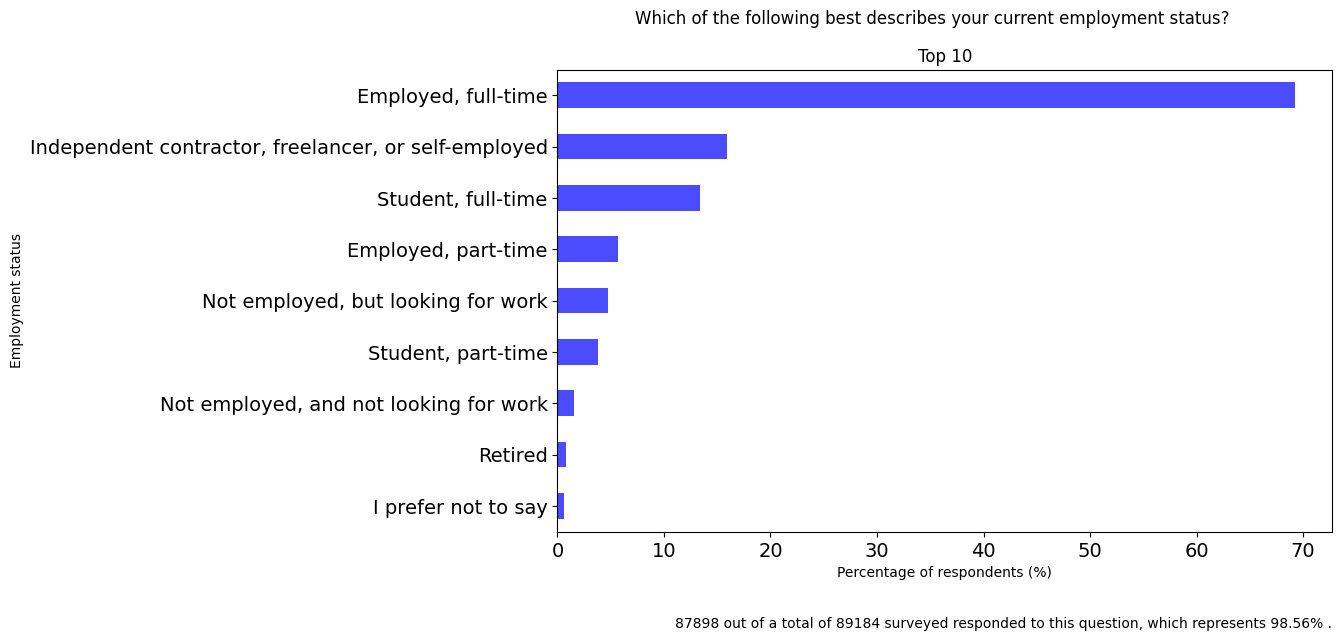

In [16]:
# custom function
pre_process_plot(stack_overflow_2023, "Employment", "Which of the following best describes your current employment status?", "Employment status")

### 2.2 Job title

76872 out of a total of 89184 surveyed responded to this question, which represents 86.19% .


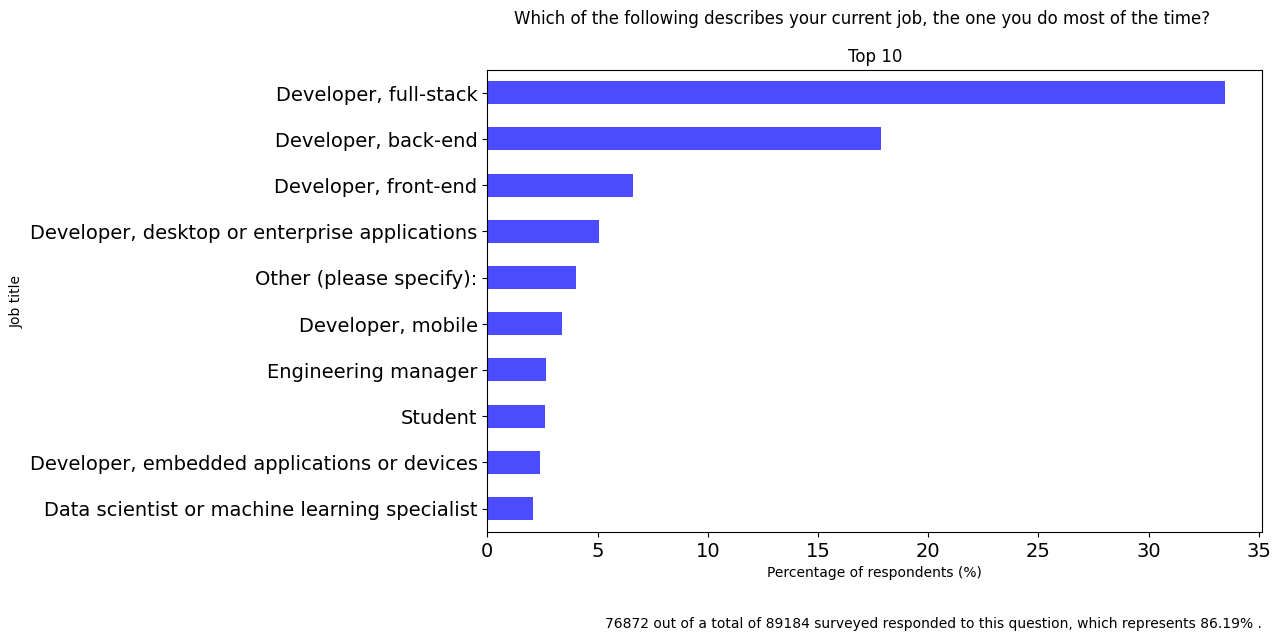

In [17]:
pre_process_plot(stack_overflow_2023, "DevType", "Which of the following describes your current job, the one you do most of the time?", "Job title")

### 2.3 Working arrangements

73810 out of a total of 89184 surveyed responded to this question, which represents 82.76 %.


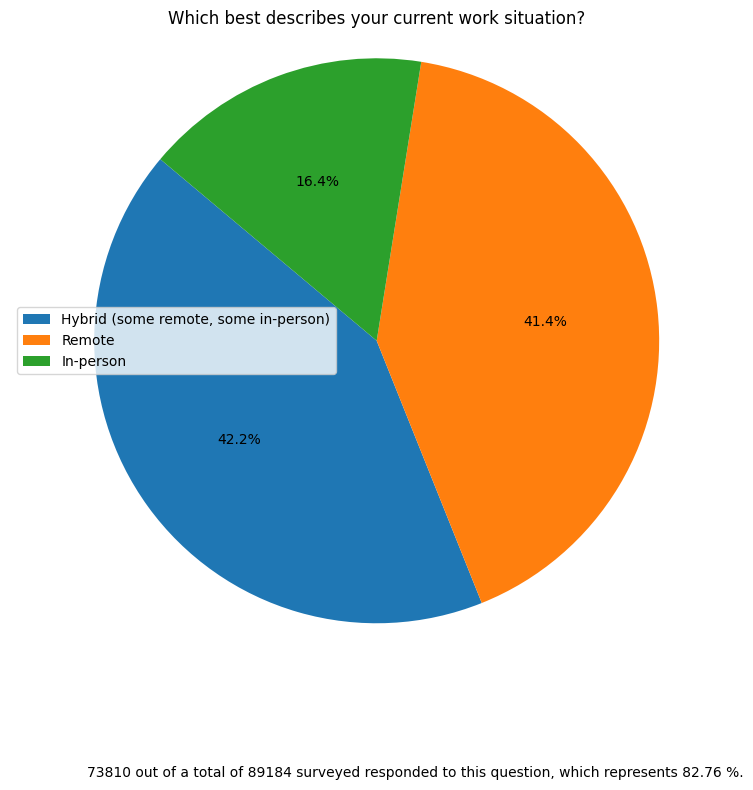

In [18]:
pie_chart_plot('RemoteWork', 'Which best describes your current work situation?')

### 2.4 Location

87973 out of a total of 89184 surveyed responded to this question, which represents 98.64% .


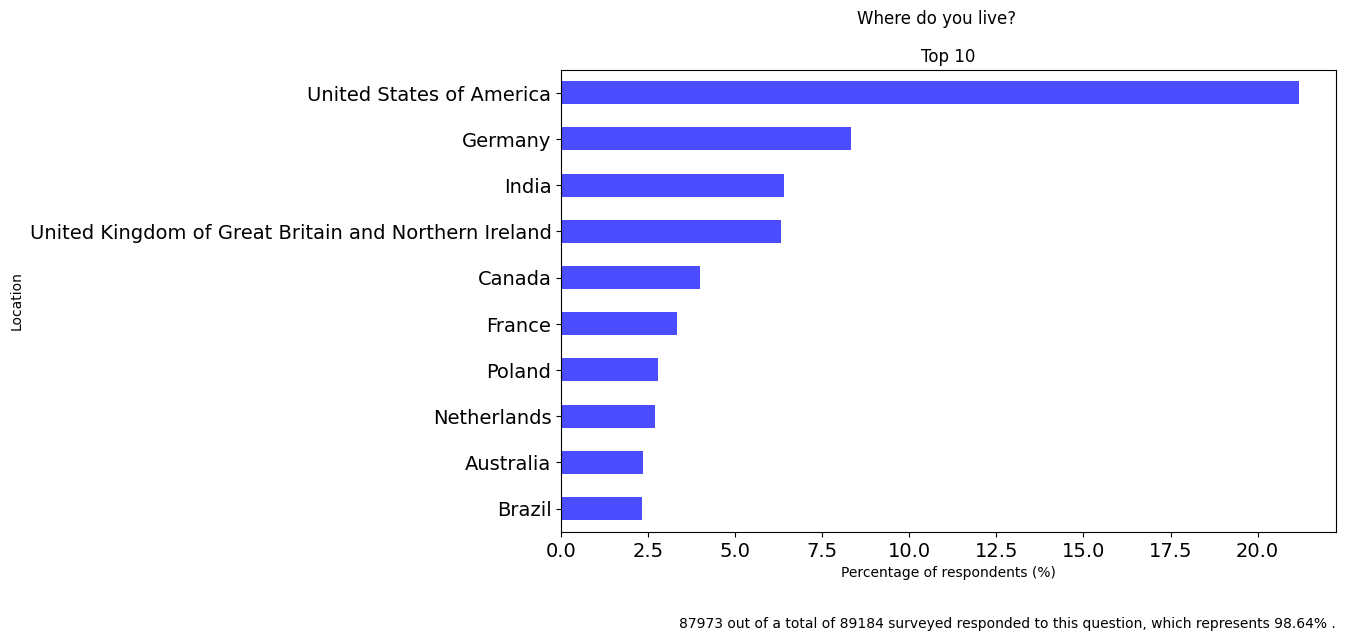

In [19]:
# custom function
pre_process_plot(stack_overflow_2023, "Country", "Where do you live?", "Location")

### 2.5 Age

89184 out of a total of 89184 surveyed responded to this question, which represents 100.0 %.


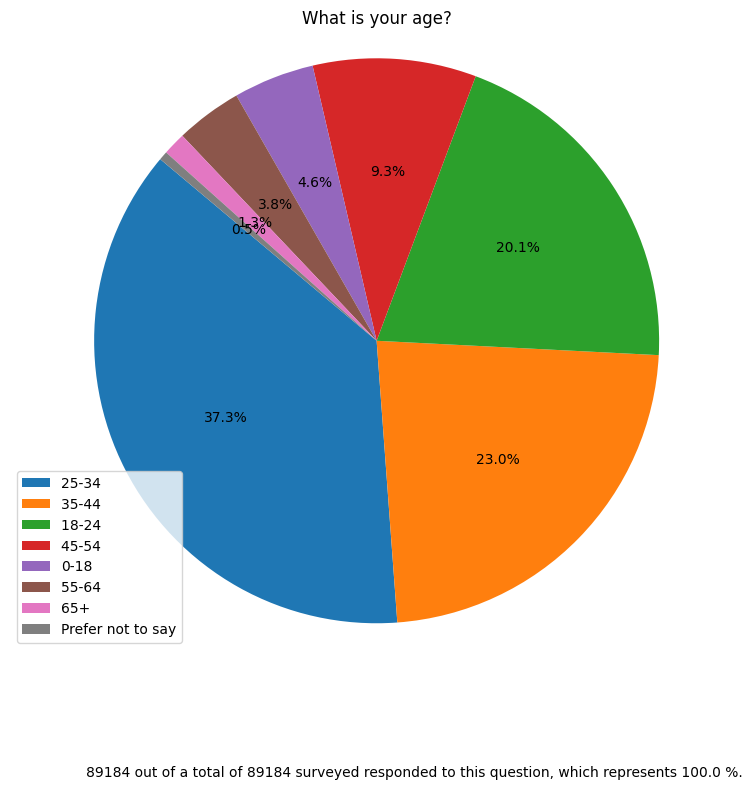

In [20]:
pie_chart_plot('Age', 'What is your age?')

### 2.6 Education status

87973 out of a total of 89184 surveyed responded to this question, which represents 98.64 %.


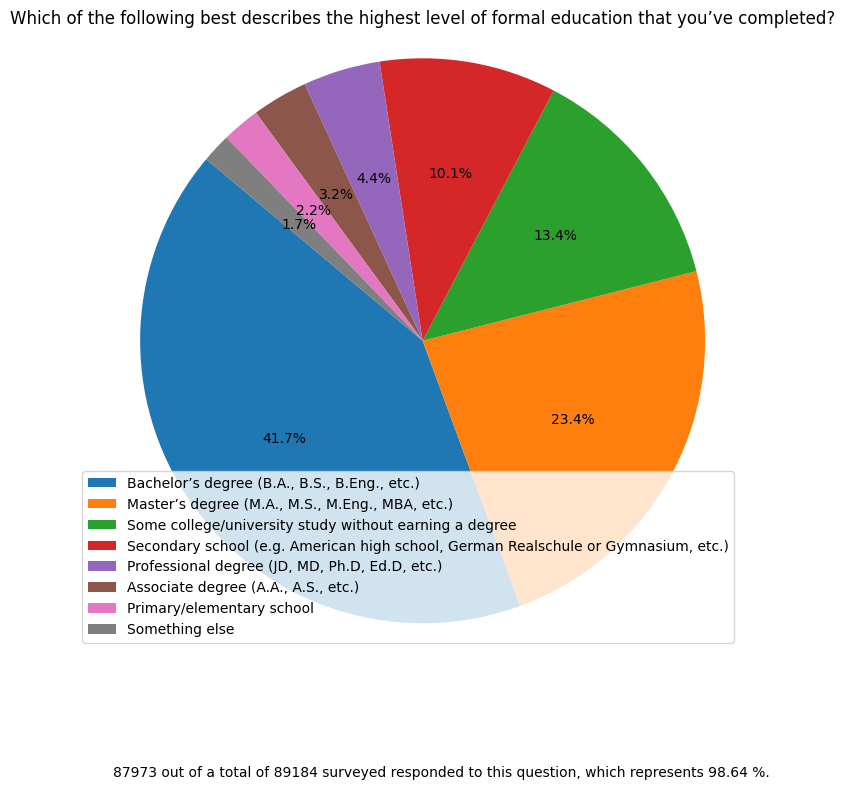

In [21]:
pie_chart_plot('EdLevel', 'Which of the following best describes the highest level of formal education that you’ve completed?')

> **So a typical respondent is an **American** aged **25 to 34** with a Bachelor's degree, working in **full time employment** as a **full-stack developer** under **hybrid** working arrangements.**


Now that we have got to know our respondents a little better let's start exploring my questions of interest.

## 3.0 Which programming languages, databases, cloud platforms, development environments and operating systems are developers working with?

### 3.1 Programming, scripting, and markup languages

In [22]:
missing_past_lang = stack_overflow_2023.LanguageHaveWorkedWith.isnull().sum()/stack_overflow_2023.shape[0]
missing_past_lang

0.022918909221385002

In [23]:
missing_future_lang = stack_overflow_2023.LanguageWantToWorkWith.isnull().sum()/stack_overflow_2023.LanguageWantToWorkWith.dropna().shape[0]
missing_future_lang

0.10500687655651786

87140 out of a total of 89184 surveyed responded to this question, which represents 97.71% .


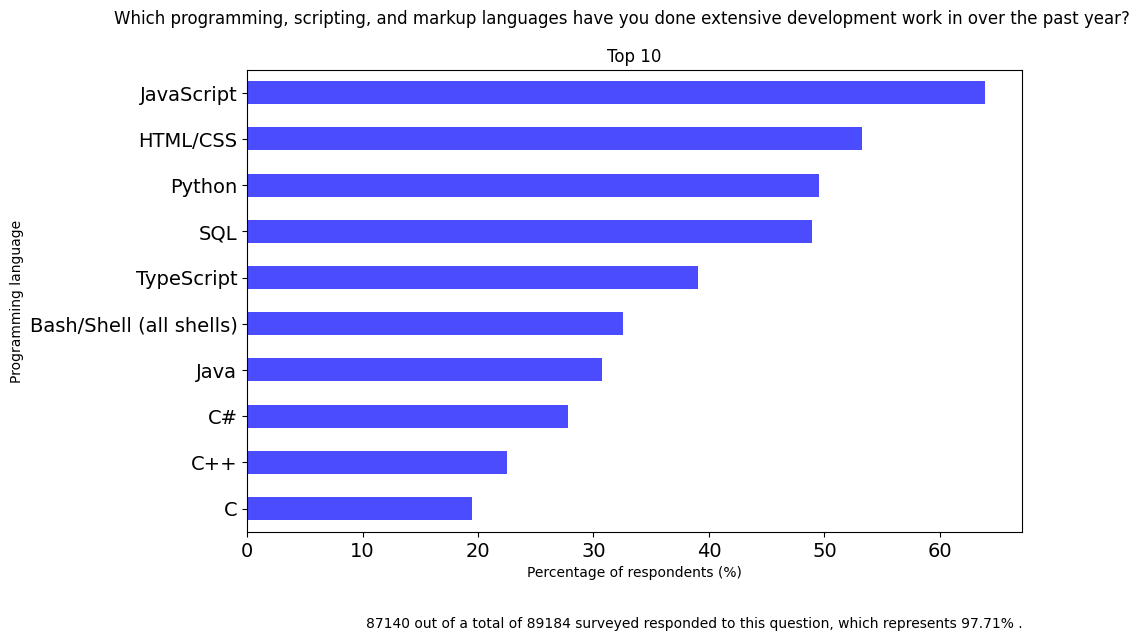

In [24]:
# custom function
pre_process_plot(stack_overflow_2023, "LanguageHaveWorkedWith", "Which programming, scripting, and markup languages have you done extensive development work in over the past year?", "Programming language")

80709 out of a total of 89184 surveyed responded to this question, which represents 90.5% .


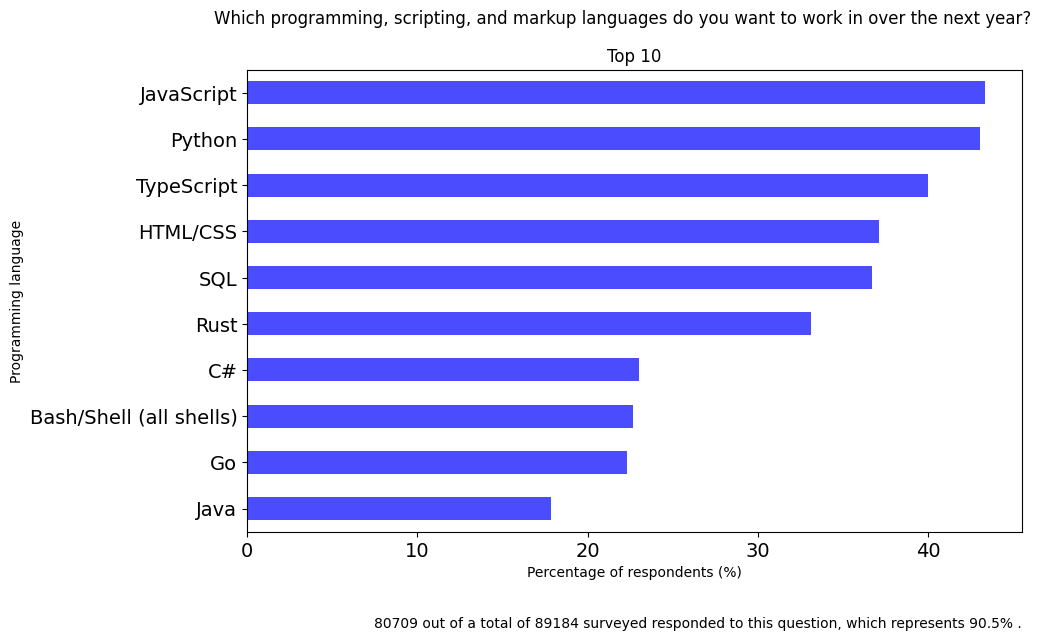

In [25]:
# custom function
pre_process_plot(stack_overflow_2023, "LanguageWantToWorkWith", "Which programming, scripting, and markup languages do you want to work in over the next year?", "Programming language")

> **JavaScript was the most used in the last year, and is also the most in demand for next year. Notable changes however are in the 

### 3.2 Database environments

73435 out of a total of 89184 surveyed responded to this question, which represents 82.34% .


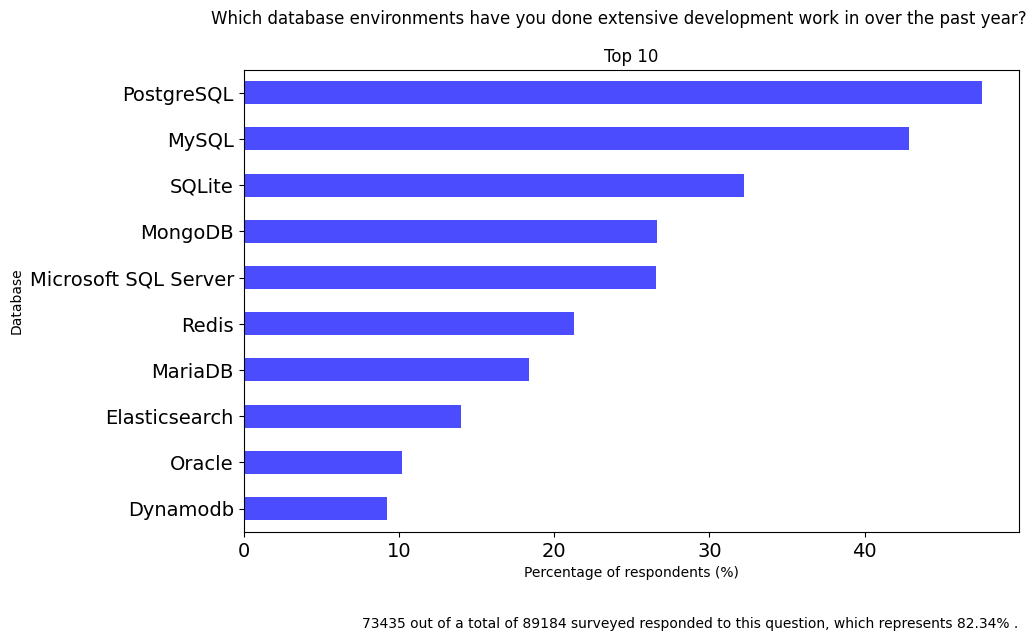

In [26]:
# custom function
pre_process_plot(stack_overflow_2023, "DatabaseHaveWorkedWith", "Which database environments have you done extensive development work in over the past year?", "Database")

60911 out of a total of 89184 surveyed responded to this question, which represents 68.3% .


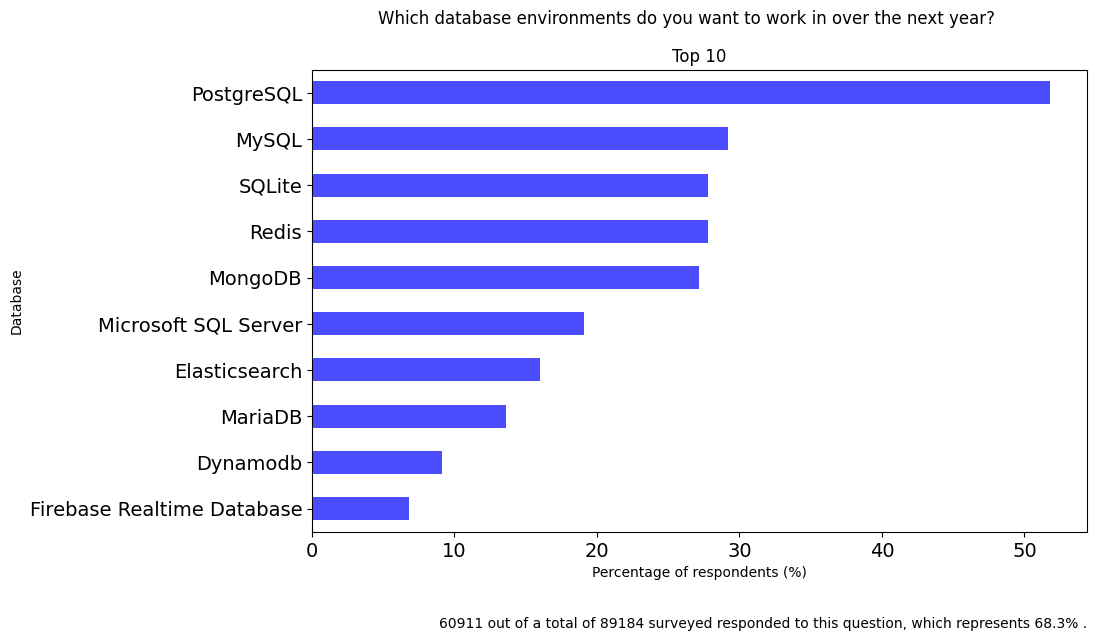

In [27]:
# custom function
pre_process_plot(stack_overflow_2023, "DatabaseWantToWorkWith", "Which database environments do you want to work in over the next year?", "Database")

### 3.3 Cloud platforms

63628 out of a total of 89184 surveyed responded to this question, which represents 71.34% .


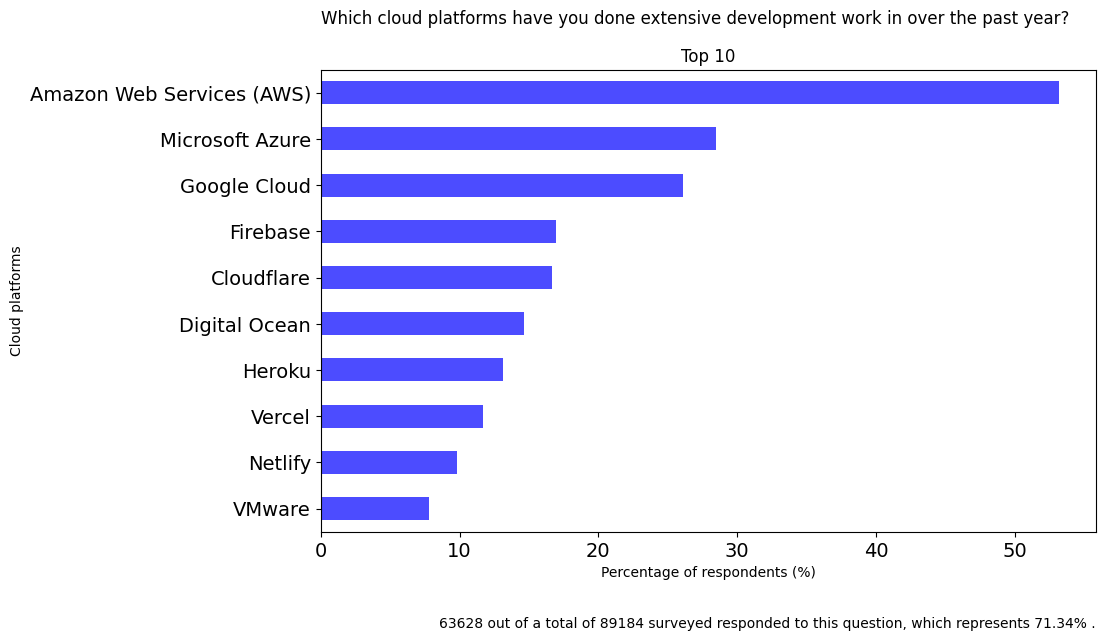

In [28]:
# custom function
pre_process_plot(stack_overflow_2023, "PlatformHaveWorkedWith", "Which cloud platforms have you done extensive development work in over the past year?", "Cloud platforms")

51308 out of a total of 89184 surveyed responded to this question, which represents 57.53% .


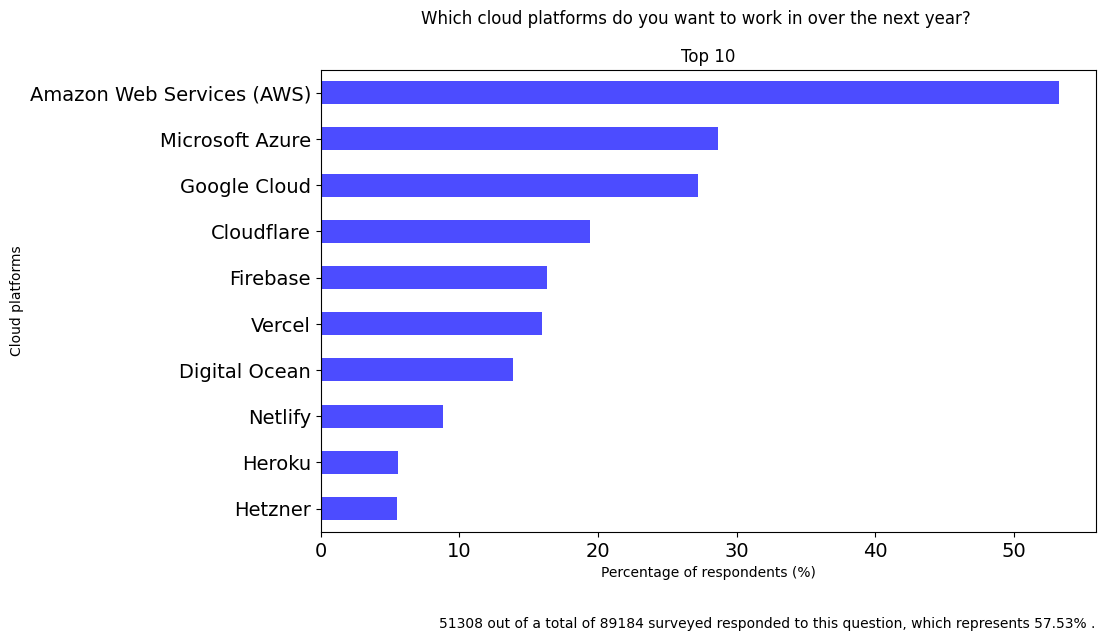

In [29]:
# custom function
pre_process_plot(stack_overflow_2023, "PlatformWantToWorkWith", "Which cloud platforms do you want to work in over the next year?", "Cloud platforms")

### 3.4 Developer tools for compiling, building and testing

77884 out of a total of 89184 surveyed responded to this question, which represents 87.33% .


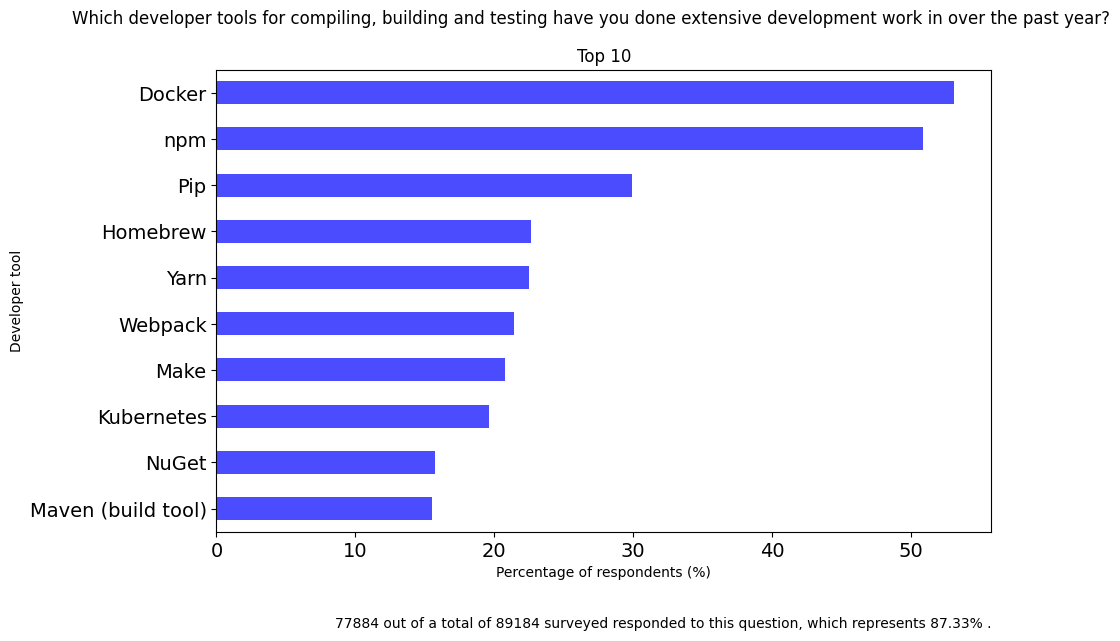

In [30]:
# custom function
pre_process_plot(stack_overflow_2023, "ToolsTechHaveWorkedWith", "Which developer tools for compiling, building and testing have you done extensive development work in over the past year?", "Developer tool")

68315 out of a total of 89184 surveyed responded to this question, which represents 76.6% .


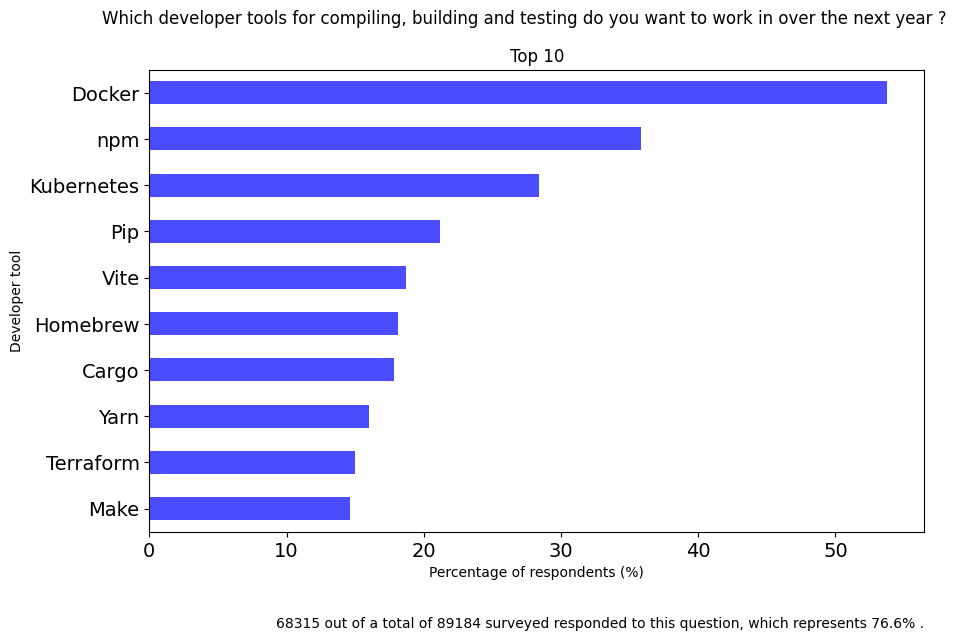

In [31]:
# custom function
pre_process_plot(stack_overflow_2023, "ToolsTechWantToWorkWith", "Which developer tools for compiling, building and testing do you want to work in over the next year ?", "Developer tool")

### 3.5 Development environments 

85864 out of a total of 89184 surveyed responded to this question, which represents 96.28% .


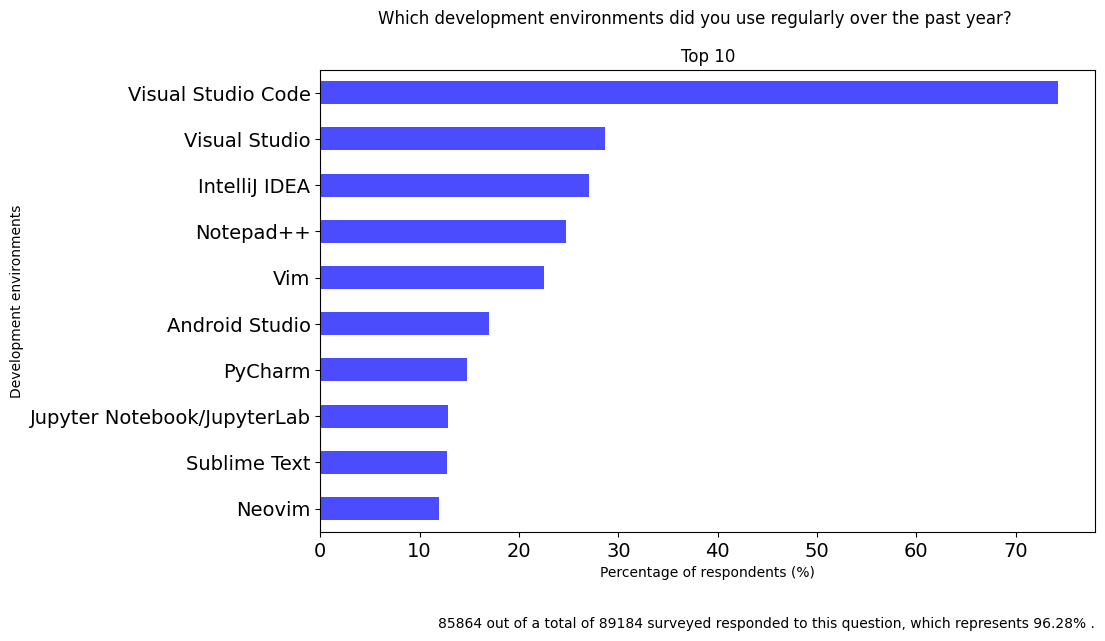

In [32]:
# custom function
pre_process_plot(stack_overflow_2023, "NEWCollabToolsHaveWorkedWith", "Which development environments did you use regularly over the past year?", "Development environments")

76649 out of a total of 89184 surveyed responded to this question, which represents 85.94% .


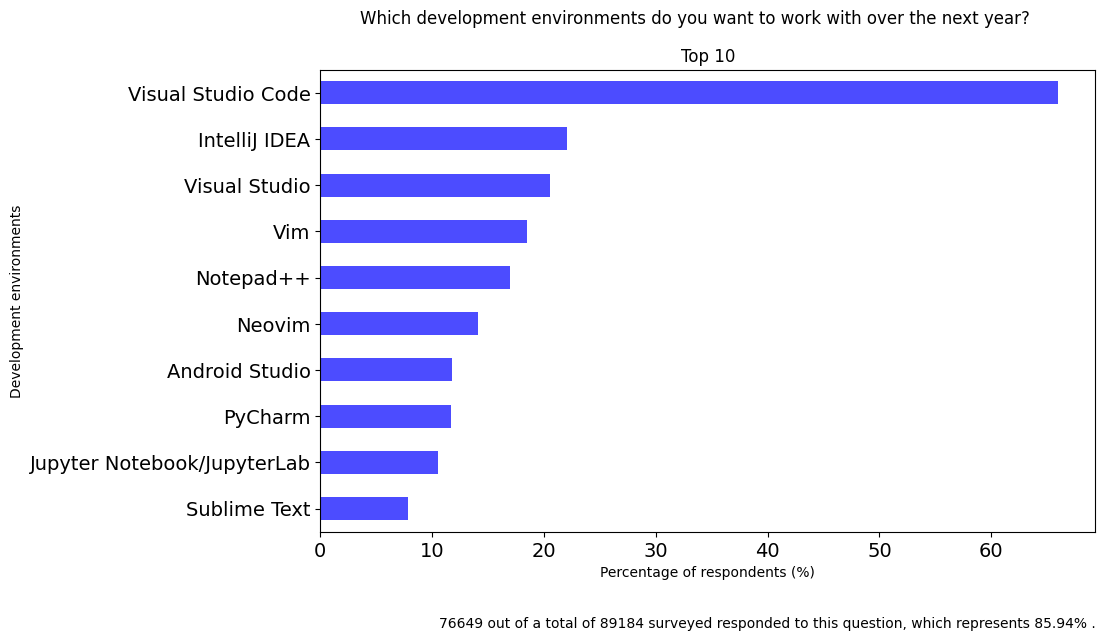

In [33]:
# custom function
pre_process_plot(stack_overflow_2023, "NEWCollabToolsWantToWorkWith", "Which development environments do you want to work with over the next year?", "Development environments")

### 3.6 Operating system

78587 out of a total of 89184 surveyed responded to this question, which represents 88.12% .


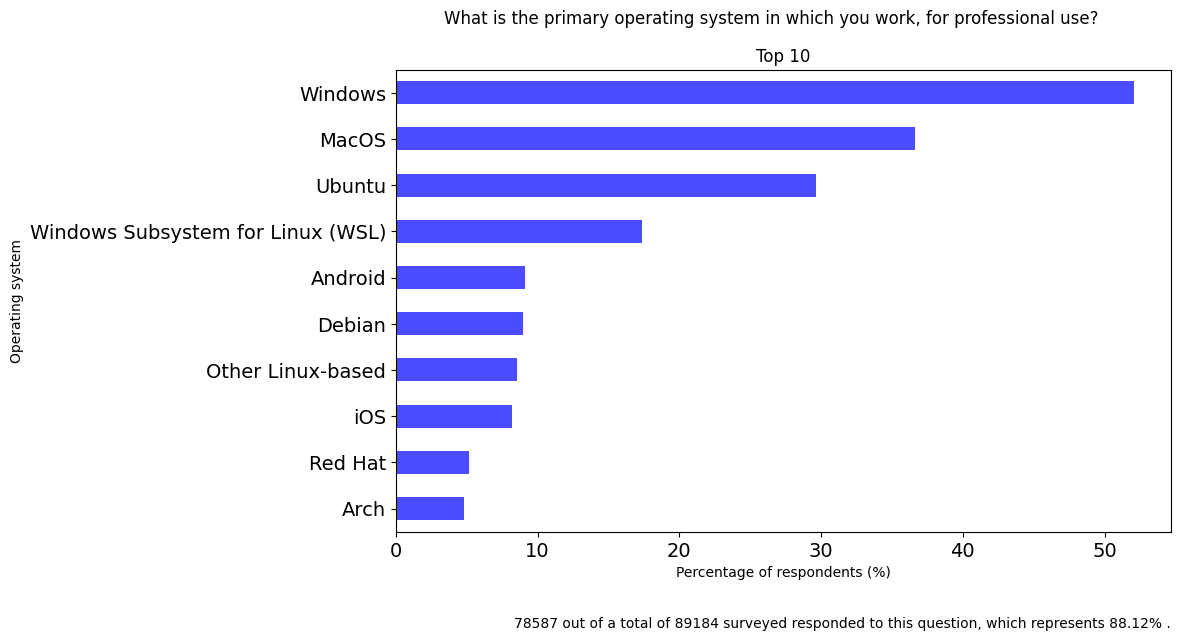

In [34]:
# custom function
pre_process_plot(stack_overflow_2023, "OpSysProfessional use", "What is the primary operating system in which you work, for professional use?", "Operating system")

> So a typical developer in the ***past year*** had the following tech stack:
> - Programming language: **JavaScript**
> - Database environment: **PostgreSQL**
> - Cloud platform: **Amazon Web Services (AWS)**
> - Build/test/compile: **Docker**
> - Development environment: **VS Code**
> - Operating system: **Windows**

> Interestingly, in terms of what people would like to work with ***next year***, the **Rust** and **Go** programming languages seem to have some traction.

## 4.0 What are the most popular learning resources?

### 4.1 How do you learn to code?

87663 out of a total of 89184 surveyed responded to this question, which represents 98.29% .


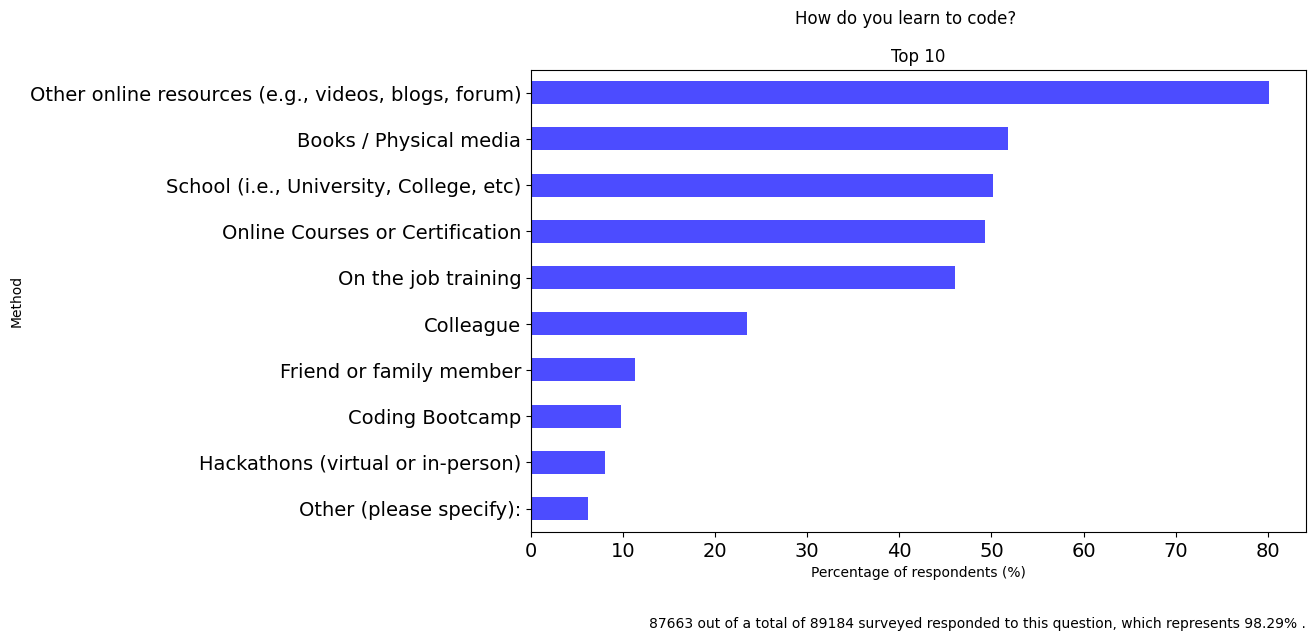

In [35]:
# custom function
pre_process_plot(stack_overflow_2023, "LearnCode", "How do you learn to code?", "Method")

### 4.2 What online resources do you use to learn to code?

70084 out of a total of 89184 surveyed responded to this question, which represents 78.58% .


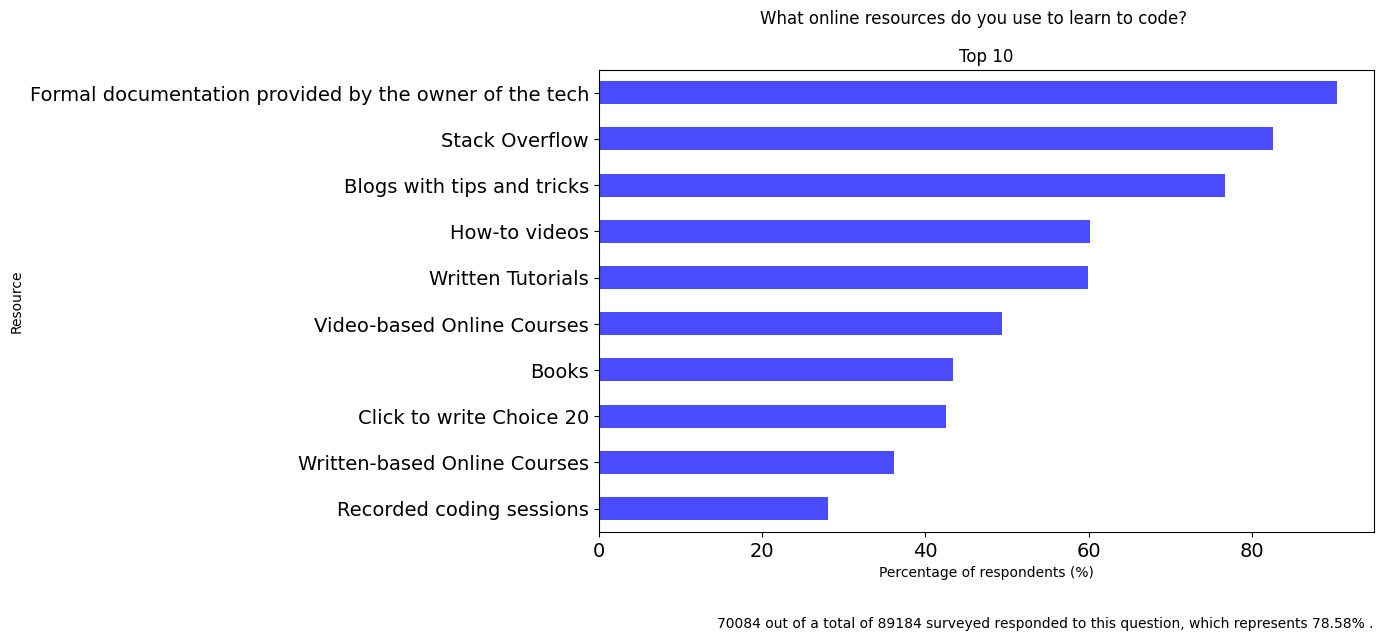

In [36]:
# custom function
pre_process_plot(stack_overflow_2023, "LearnCodeOnline", "What online resources do you use to learn to code?", "Resource")

>In terms of learning tools, the preference appears to be for digestible online content (videos/blogs/forum) which is line with the general trend away from more rigid mediums. People are going straight to the **source documentation** for learning purposes, with Stack Overflow and analogue still holding on in there for now.

## 5.0 How do salary levels vary according to industry, job title, and age?

### What is your current total annual compensation (salary, bonuses, and perks, before taxes and deductions)?

In [37]:
# get number of non-nulls
total_participants = stack_overflow_2023.shape[0]
total_responses = stack_overflow_2023.ConvertedCompYearly.count()
no_responses = stack_overflow_2023.ConvertedCompYearly.isna().sum()
participation_rate = round(total_responses/total_participants * 100,2)
print("{} out of a total of {} surveyed responded to this question, which represents {}% .".format(total_responses,total_participants,participation_rate))

48019 out of a total of 89184 surveyed responded to this question, which represents 53.84% .


The response rate for this question was low - just over half of people provided a salay figure. Let's drop the NaN values and take a look at the distribution of reported salaries. We can get a quick overview of the spread of numerical data using pandas `.describe()`.

In [38]:
salaries=stack_overflow_2023.ConvertedCompYearly
salaries.describe()

count      48019.00
mean      103110.08
std       681418.84
min            1.00
25%        43907.00
50%        74963.00
75%       121641.00
max     74351432.00
Name: ConvertedCompYearly, dtype: float64

As we can see the figures given should be treated with professional skepticism - a minimum value of 1 dollar and a maximum of 74.3m!
These extreme values put the meaningless in mean. A more robust indicator is the **median** value, which is not influenced by outliers. This is represented by the 50% value - 74,963. So, around ***75k dollars per annum***.

### 5.1 Median salary levels by industry

Industry
Wholesale                                                             59513.00
Higher Education                                                      62400.00
Information Services, IT, Software Development, or other Technology   68494.00
Manufacturing, Transportation, or Supply Chain                        74963.00
Oil & Gas                                                             74963.00
Legal Services                                                        75000.00
Other                                                                 80317.00
Retail and Consumer Services                                          80317.00
Insurance                                                             81552.00
Advertising Services                                                  82245.00
Financial Services                                                    85000.00
Healthcare                                                            89327.00
Name: ConvertedCompYearly, dtype: float64


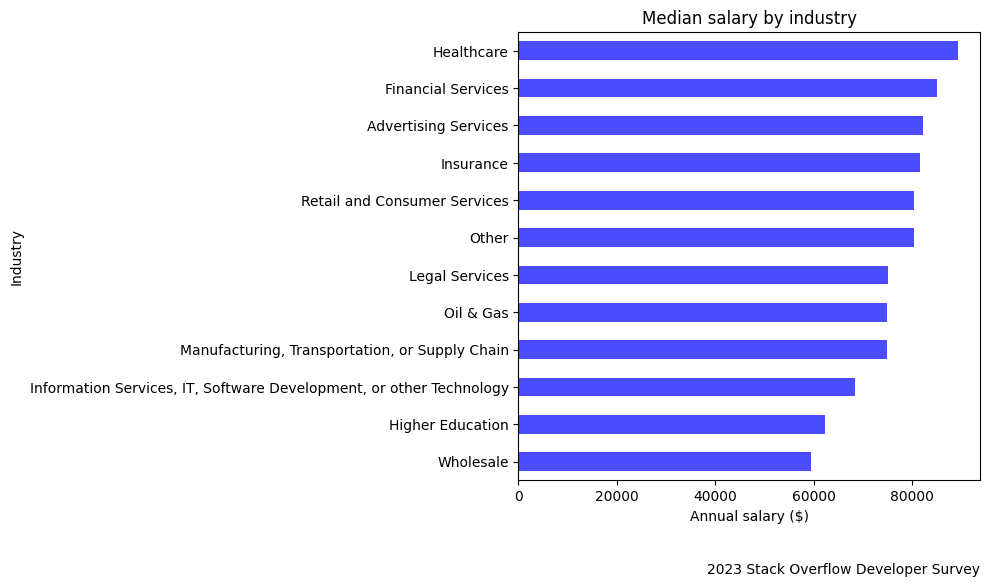

In [39]:
# Median sals
salary_industry = stack_overflow_2023.groupby('Industry')['ConvertedCompYearly'].agg('median').sort_values(ascending=True)
print(salary_industry)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))

salary_industry.plot(kind='barh', color='blue', alpha=0.7)

plt.title('Median salary by industry')
plt.xlabel("Annual salary ($)")
plt.ylabel('Industry')
plt.xticks(rotation=0)

# Add a footnote below and to the right side of the chart
plt.annotate('2023 Stack Overflow Developer Survey',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)
    
plt.tight_layout()
 
plt.show(); 

### 5.2 Median salary levels by job description

DevType
Student                                          15421.00
Academic researcher                              53545.00
System administrator                             55764.00
Designer                                         59815.00
Developer, front-end                             59970.00
Data or business analyst                         61555.00
Project manager                                  63183.00
Developer, QA or test                            63927.00
Educator                                         65269.50
Developer, mobile                                68192.50
Developer, desktop or enterprise applications    70759.00
Developer, game or graphics                      71007.00
Developer, full-stack                            71140.00
Developer, back-end                              76034.00
Developer, embedded applications or devices      77104.00
Database administrator                           78686.50
DevOps specialist                                80158.50
Data s

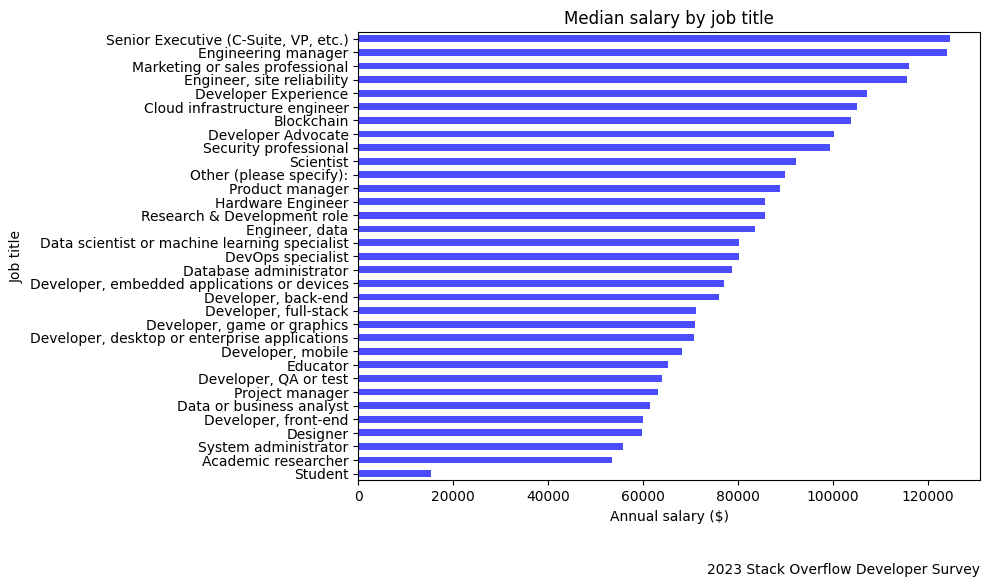

In [40]:
# Average sals
salary_job_descript = stack_overflow_2023.groupby('DevType')['ConvertedCompYearly'].agg('median').sort_values(ascending=True)
print(salary_job_descript)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))

salary_job_descript.plot(kind='barh', color='blue', alpha=0.7)

plt.title('Median salary by job title')
plt.xlabel("Annual salary ($)")
plt.ylabel('Job title')
plt.xticks(rotation=0)

# Add a footnote below and to the right side of the chart
plt.annotate('2023 Stack Overflow Developer Survey',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)
    
plt.tight_layout()

plt.show(); 

### 5.3 Median salary levels by age

Age
0-18                 13226.00
18-24                37931.00
25-34                66700.00
35-44                90987.00
45-54               100656.50
65+                 107090.00
55-64               110000.00
Prefer not to say   121630.00
Name: ConvertedCompYearly, dtype: float64


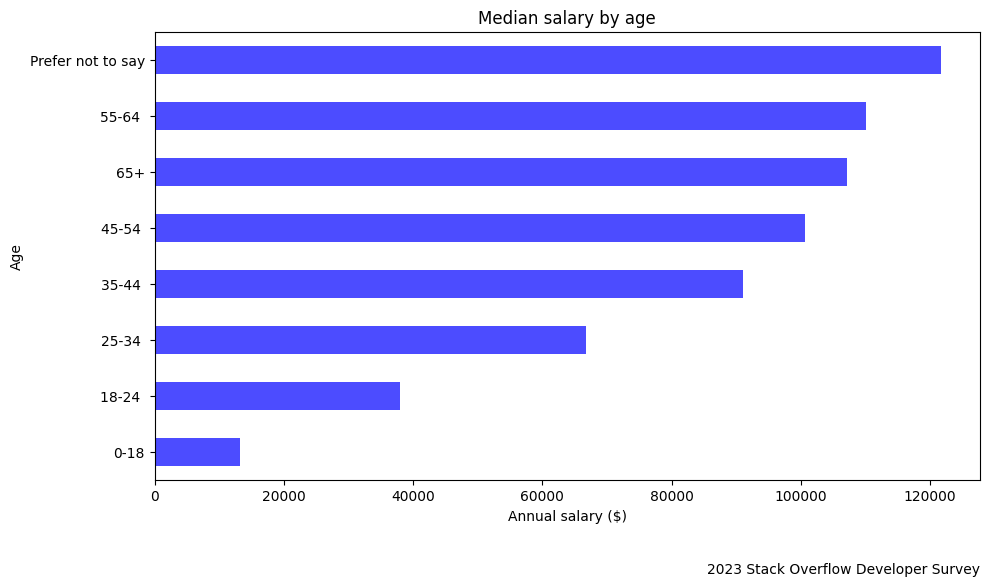

In [41]:
# Average sals
salary_age = stack_overflow_2023.groupby('Age')['ConvertedCompYearly'].agg('median').sort_values(ascending=True)
print(salary_age)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))

salary_age.plot(kind='barh', color='blue', alpha=0.7)

plt.title('Median salary by age')
plt.xlabel("Annual salary ($)")
plt.ylabel('Age')
plt.xticks(rotation=0)

# Add a footnote below and to the right side of the chart
plt.annotate('2023 Stack Overflow Developer Survey',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)
    
plt.tight_layout()

plt.show(); 

>The median salary of the respondents was **75k** dollars. The survey responses indicate that **Healthcare (89k)**, **Financial Services(85k)** and **Advertising(82k)** industries offer the best salary prospects.

> The median **data scientist** salary was **80k**, considerably more than **data analyst(61.5k)**, but slightly below **data engineer(83.5k)**. However, the division between these three roles is not clearcut and there is often considerable overlap between the roles and disparity in role requirements.

**Professional skepticism** should of course always be applied regarding the accuracy of survey responses in relation to salary.

## 6.0 To what extent are AI tools being leveraged?

Most of the questions in the Artificial Intelligence (AI) section were **optional**. This is reflected in the low response rates.

### 6.1 AI-powered search tools

56328 out of a total of 89184 surveyed responded to this question, which represents 63.16% .


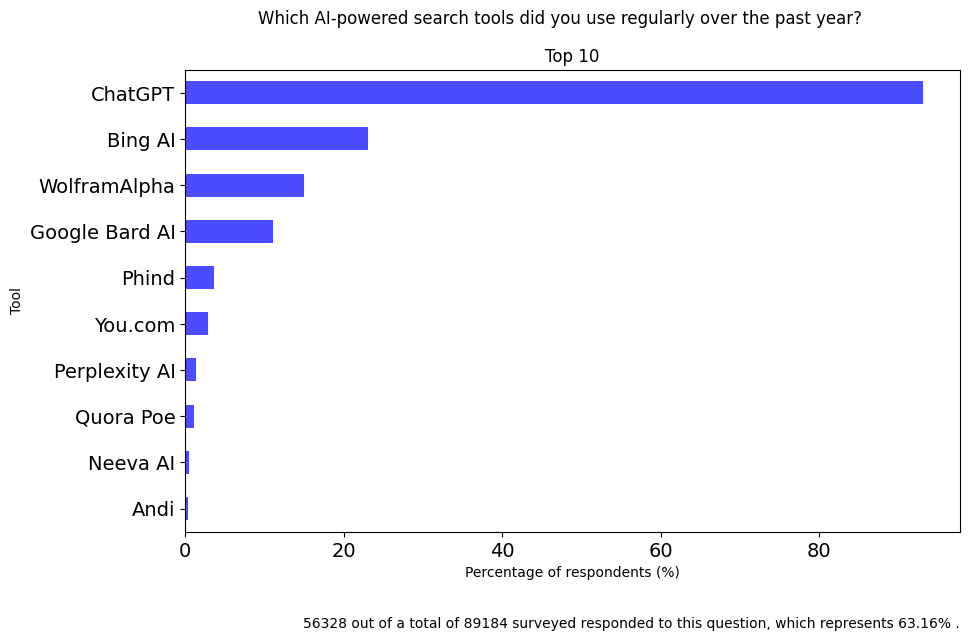

In [42]:
# custom function
pre_process_plot(stack_overflow_2023, "AISearchHaveWorkedWith", "Which AI-powered search tools did you use regularly over the past year?", "Tool")

46150 out of a total of 89184 surveyed responded to this question, which represents 51.75% .


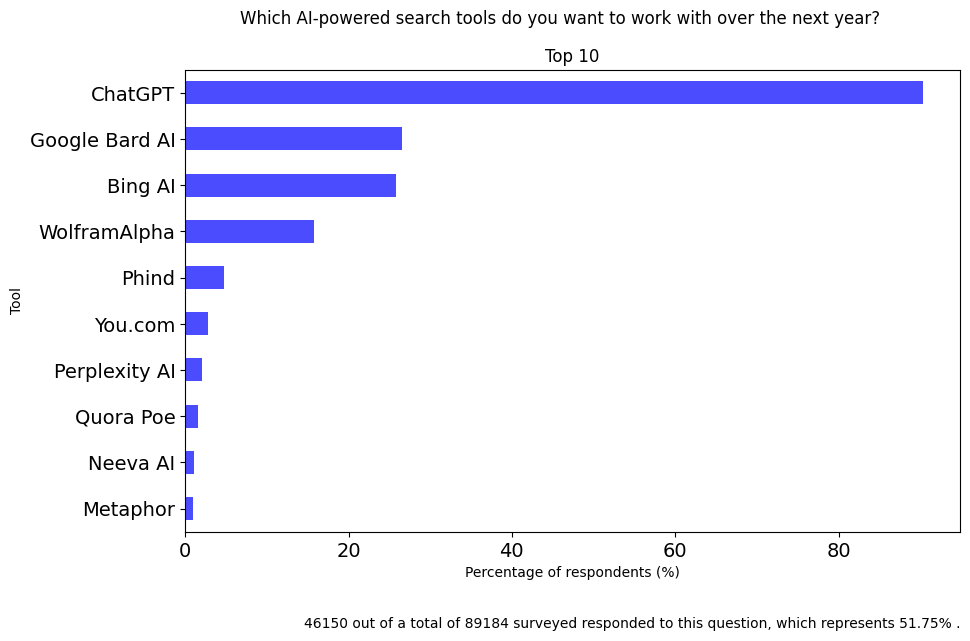

In [43]:
# custom function
pre_process_plot(stack_overflow_2023, "AISearchWantToWorkWith", "Which AI-powered search tools do you want to work with over the next year?", "Tool")

### 6.2 AI-powered developer tools

25904 out of a total of 89184 surveyed responded to this question, which represents 29.05% .


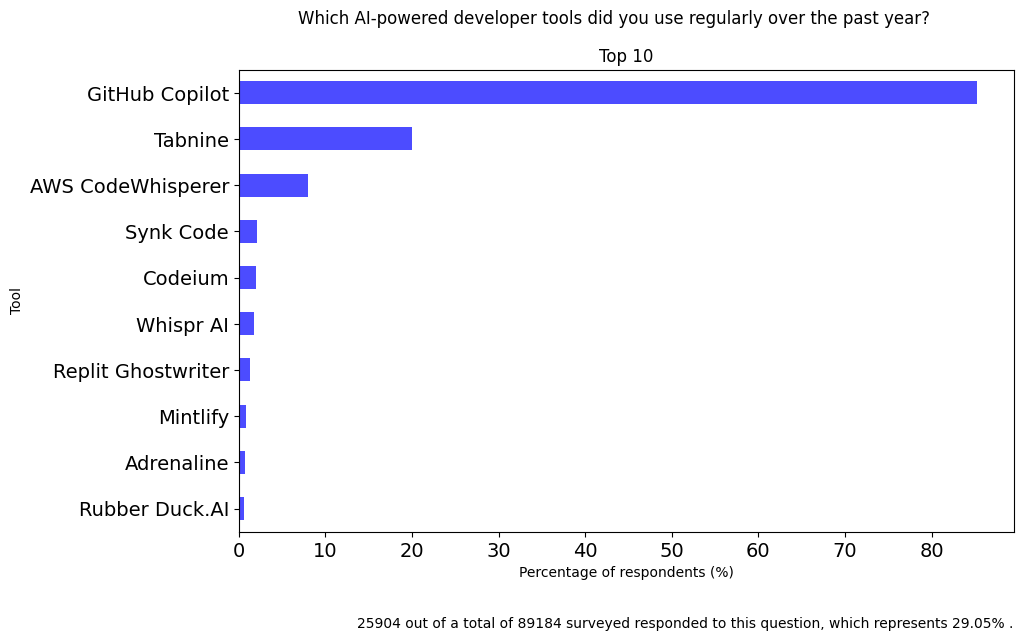

In [44]:
# custom function
pre_process_plot(stack_overflow_2023, "AIDevHaveWorkedWith", "Which AI-powered developer tools did you use regularly over the past year?", "Tool")

19587 out of a total of 89184 surveyed responded to this question, which represents 21.96% .


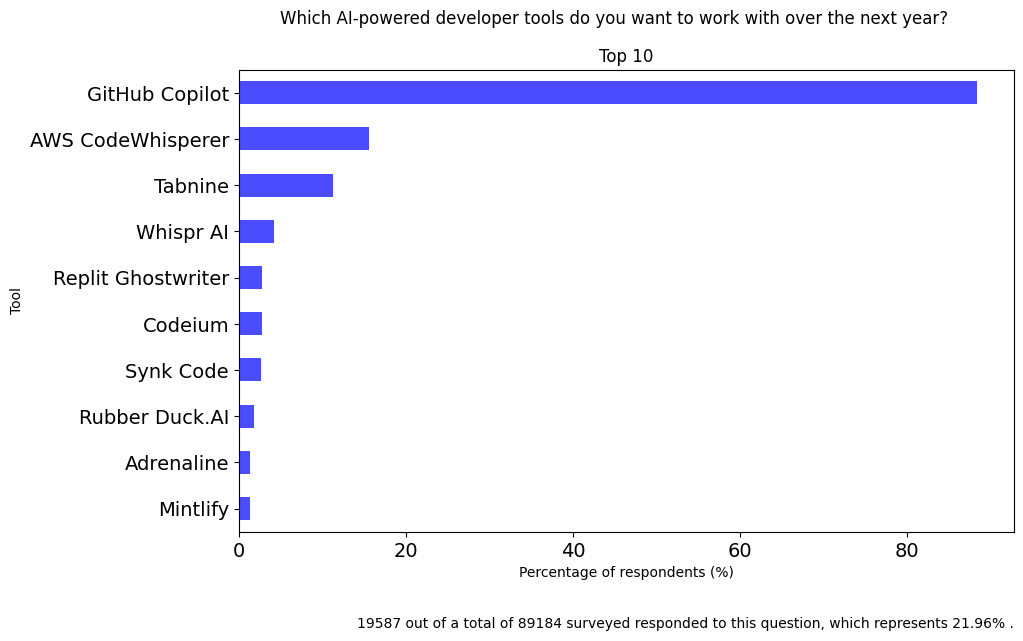

In [45]:
# custom function
pre_process_plot(stack_overflow_2023, "AIDevWantToWorkWith", "Which AI-powered developer tools do you want to work with over the next year?", "Tool")

### 6.3 Do you currently use AI tools in your development process?

87973 out of a total of 89184 surveyed responded to this question, which represents 98.64 %.


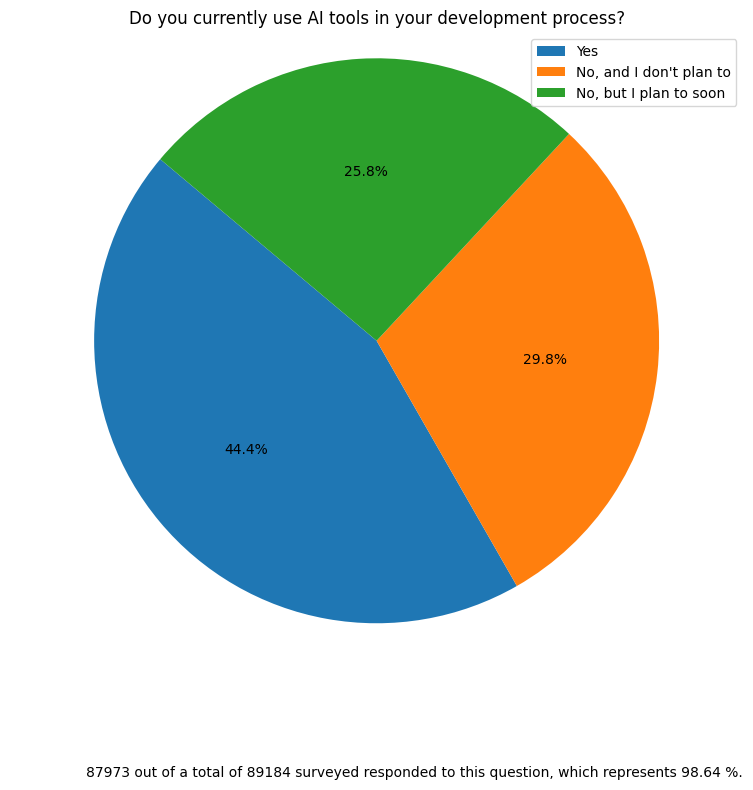

In [46]:
pie_chart_plot('AISelect', 'Do you currently use AI tools in your development process?')

#### 6.3.1 Do you currently use AI tools in your development process - by age?

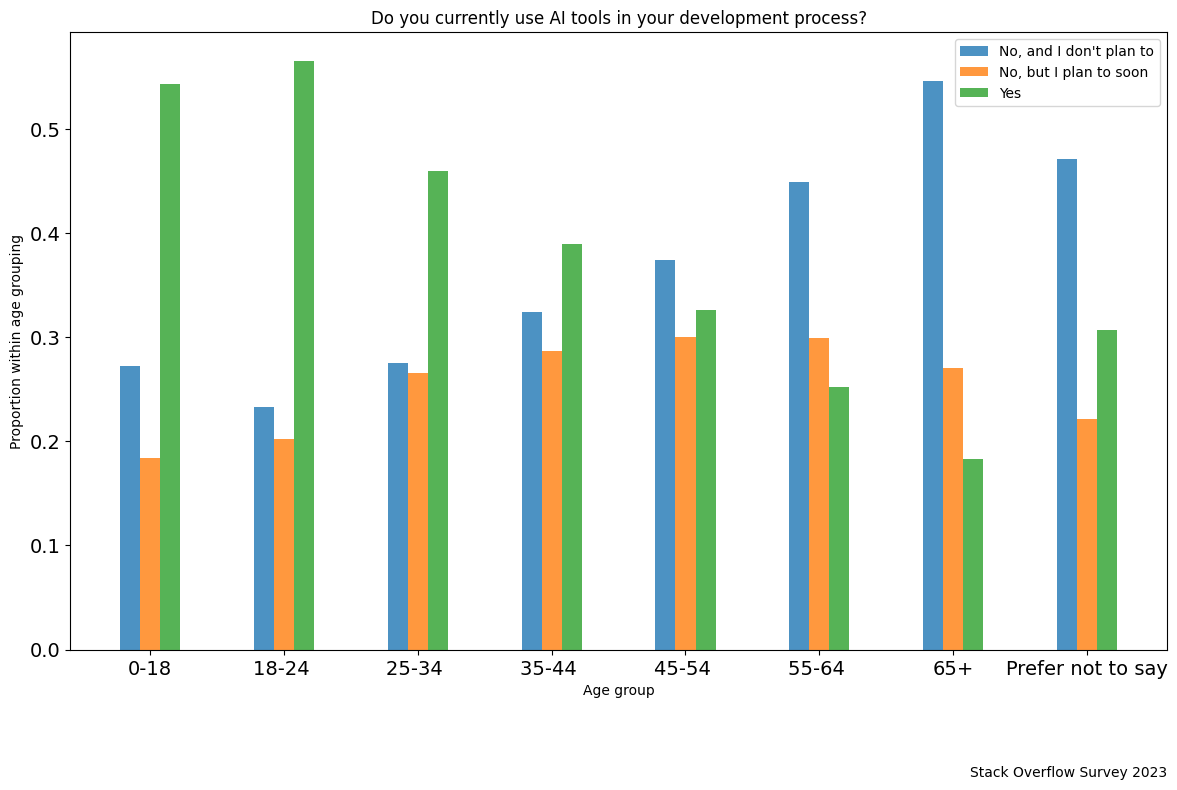

In [47]:
category_plot('AISelect', 'Do you currently use AI tools in your development process?')

### 6.4 How favorable is your stance on using AI tools as part of your development workflow?

61501 out of a total of 89184 surveyed responded to this question, which represents 68.96 %.


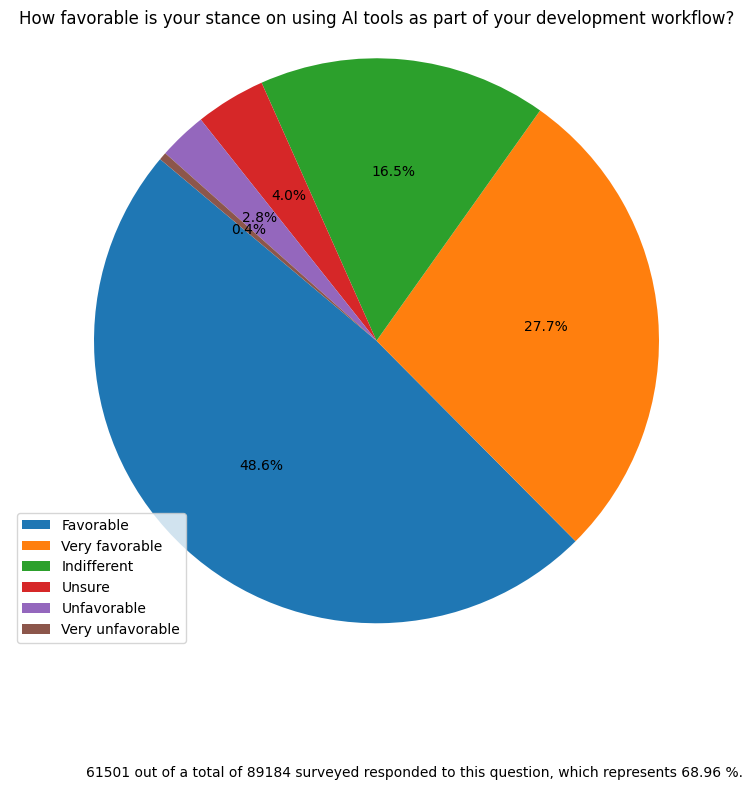

In [48]:
pie_chart_plot('AISent', 'How favorable is your stance on using AI tools as part of your development workflow?')

#### 6.4.1 How favorable is your stance on using AI tools as part of your development workflow? - by age

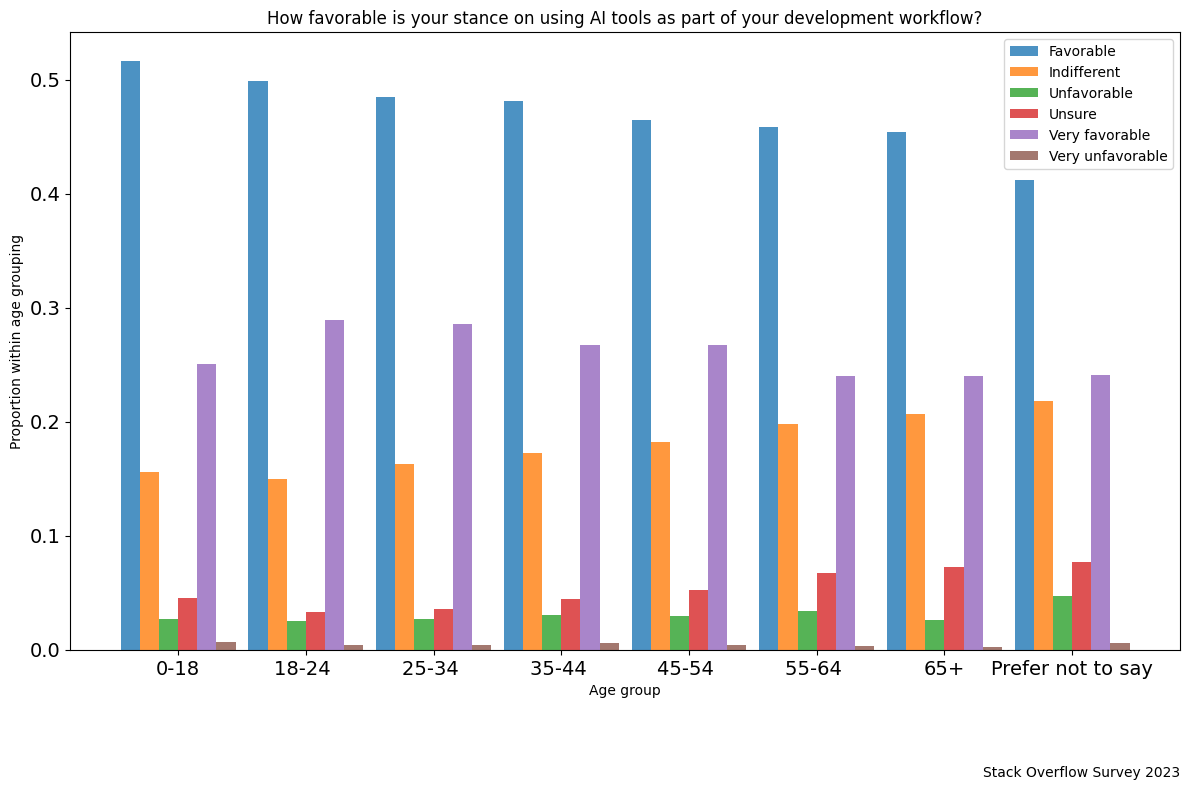

In [49]:
category_plot('AISent', 'How favorable is your stance on using AI tools as part of your development workflow?')

### 6.5 How much do you trust the accuracy of the output from AI tools as part of your development workflow?

61396 out of a total of 89184 surveyed responded to this question, which represents 68.84 %.


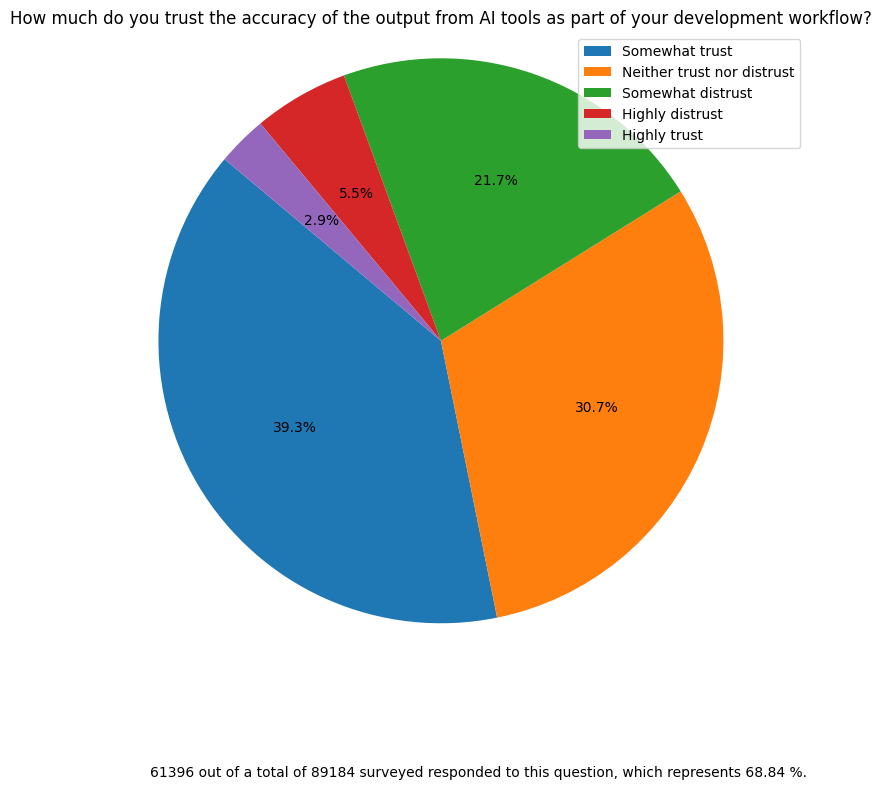

In [50]:
pie_chart_plot('AIBen', 'How much do you trust the accuracy of the output from AI tools as part of your development workflow?')

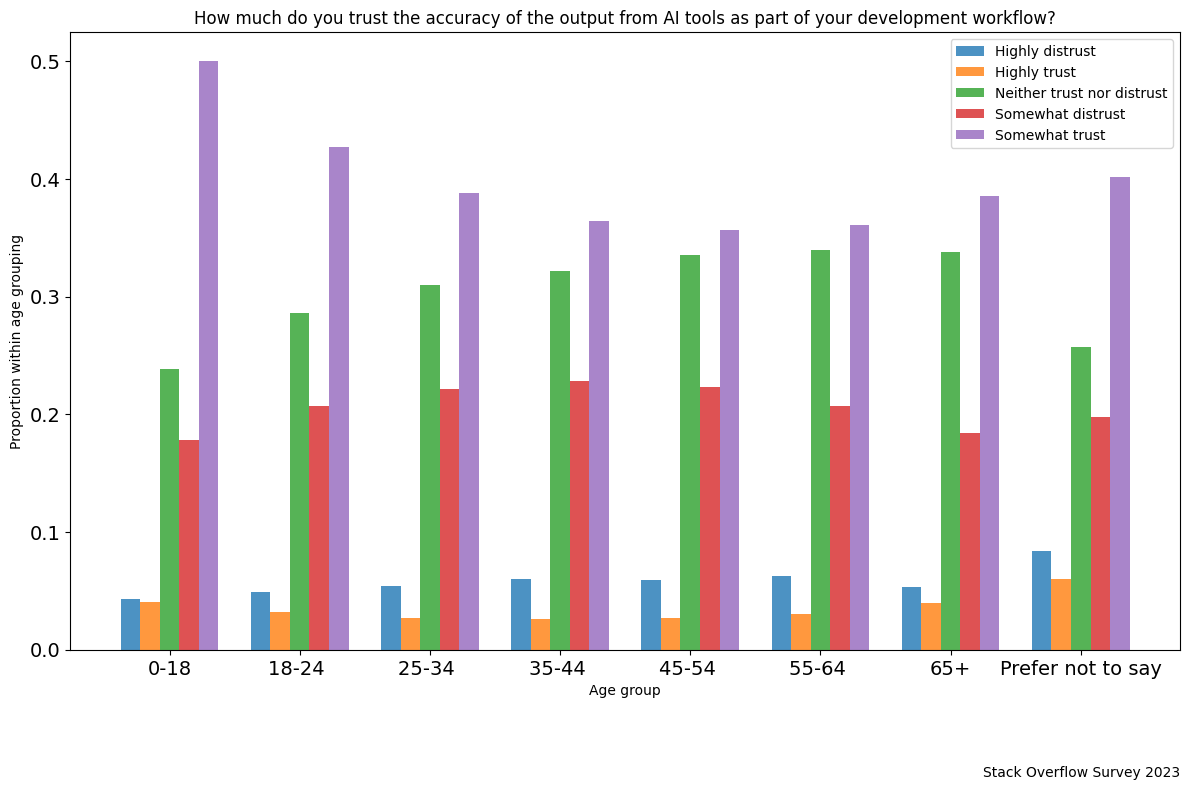

In [51]:
category_plot('AIBen', 'How much do you trust the accuracy of the output from AI tools as part of your development workflow?')

> Just over **70%** of respondents either currently use, or plan to use AI tools in their development process. The dominant tools are **ChatGPT** and **GitHub Copilot**. 

> The ***post-internet*** generation are in general warmer to AI as one might expect, with over 50% of under 24s using AI tools in their development process and workflow. This proportion generally falls as we work up the age groupings,  to around 25% for the 55-64 age group.

> **Over 75%** of respondents have a ***favorable*** or ***very favorable*** stance on using AI tools as part of their development flow. As one might expect the trend across age groupings mirrors that of the use of AI, with favourability dropping with age.

> Only **2.8%** of respondents ***highly*** trust the accuracy of the output from AI tools, whilst just under **50%** ***somewhat*** trust it. Just under **25%** expressed some form of ***mistrust***. So, while there was an overwhelming favorable stance on using AI tools, confidence in the accuracy of output is currently lukewarm. This is pretty much in line with what I was expecting based on my own view. AI is here to stay and given the plausible asuumption that its performance is likely to improve, confidence is also likely to improve with time.

## 7. Answers to my original questions

### Q1. What does a typical tech stack look like these days?

> A typical developer in the ***past year*** had the following tech stack:
> - Programming language: **JavaScript**
> - Database environment: **PostgreSQL**
> - Cloud platform: **Amazon Web Services (AWS)**
> - Build/test/compile: **Docker**
> - Development environment: **VS Code**
> - Operating system: **Windows**

> The **Rust** and **Go** programming languages seem to have some traction going forward.

### Q2. What are the most popular learning resources?

>In terms of learning tools, the preference appears to be for digestible online content (videos/blogs/forum) which is line with the general trend away from more rigid mediums. People are going straight to the **source documentation** for learning purposes, with Stack Overflow and analogue still holding on in there for now.

### Q3.  How do salary levels vary according to industry and job title?

>The median salary of the respondents was **75k** dollars. The survey responses indicate that **Healthcare (89k)**, **Financial Services(85k)** and **Advertising(82k)** industries offer the best salary prospects.

> The median **data scientist** salary was **80k**, considerably more than **data analyst(61.5k)**, but slightly below **data engineer(83.5k)**. However, the division between these three roles is not clearcut and there is often considerable overlap between the roles and disparity in role requirements.

**Professional skepticism** should of course always be applied regarding the accuracy of survey responses in relation to salary.

### Q4. To what extent are AI tools being leveraged and what is the general sentiment with regards to AI - do people trust it?

> Just over **70%** of respondents either currently use, or plan to use AI tools in their development process. The dominant tools are **ChatGPT** and **GitHub Copilot**. 

> The *"post-internet"* generation are in general warmer to AI as one might expect, with over ***50% of under 24s*** using AI tools in their development process and workflow. This proportion generally falls as we work up the age groupings to around ***25% for the 55-64 age group***.

> **Over 75%** of respondents have a ***favorable*** or ***very favorable*** stance on using AI tools as part of their development flow. As one might expect the trend across age groupings mirrors that of the use of AI, with favourability dropping with age.

> While there was an overwhelming favorable stance on using AI tools, confidence in the **accuracy** of output is currently lukewarm. Only **2.8%** of respondents ***highly trust*** the accuracy of the output from AI tools, whilst just under **50%** ***somewhat trust*** it.  Just under **25%** expressed some form of ***mistrust***. This is pretty much in line with what I was expecting based on my own view. AI is here to stay and given the plausible asuumption that its performance is likely to improve over time, confidence is also likely to increase.

## 8. Hurdles, caveats, takeaways

### 8.1 Hurdles

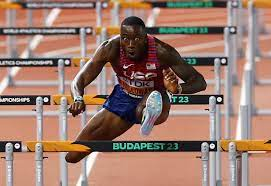

The data was reasonably clean, however : 

- Some of the columns included multistrings relating to questions with the format *"Tick all that apply"*. 

- The **Age** column was a range and included unwanted text. 

I wrote three custom functions to overcome these difficulties, which considerably reduced the time to clean the data and visualize my results.

### 8.2 Caveats

As highlighted in Section 1, the dataset contains a lot of missing data. Given the nature of the dataset which was derived from an isolated survey, for the purposes of my analysis no data was dropped and no imputation was carried out. 

### 8.3 Takeaways

Thanks for taking the time to read this blog, my first on Medium. Hopefully you learned something new. 

I'd be particulary interested in hearing from users of Rust and Go! From the survey it seems that these languages are gaining in popularity. Is Python getting "RUSTy" and is it time for JavaScript to "Go" ? I am always happy to connect with fellow data enthusiasts. See you in my next article!